In [1]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import functions,loading,replay_run

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## Main analysis

In [3]:
# importlib.reload(functions)
# # find out which sessions have pre/task/post
# df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
# epochs = pd.DataFrame()
# for basepath in df.basepath:
#     temp_df = loading.load_epoch(basepath)
#     temp_df['basepath'] = basepath
#     epochs = pd.concat([epochs,temp_df],ignore_index=True)
# for basepath in epochs.basepath.unique():
#     pattern_idx,_ = functions.find_epoch_pattern(epochs[epochs.basepath == basepath].environment,['sleep','linear','sleep'])

#     epochs.loc[epochs.basepath == basepath,'pattern_idx'] = pattern_idx is not None
# cell_metrics = loading.load_all_cell_metrics(epochs[epochs.pattern_idx].basepath.unique())
# # find remaining sessions with >80 pyr ca1 units
# # grp_basepath = cell_metrics[(cell_metrics.putativeCellType.str.contains('Pyr') &
# #                              cell_metrics.brainRegion.str.contains('CA1'))].basepath.value_counts() > 10
# # basepaths = grp_basepath[grp_basepath.values].index

In [4]:
# epochs[epochs.basepath.str.contains('Kenji') & (epochs.behavioralParadigm == 1) & epochs.pattern_idx]

In [5]:
# idx = cell_metrics.basepath.str.contains('AYA')
# cell_metrics[idx].basepath.unique()

In [6]:
# grp_basepath = cell_metrics[(cell_metrics.putativeCellType.str.contains('Pyr') &
#                              cell_metrics.brainRegion.str.contains('CA1'))].basepath.value_counts() > 20
# basepaths = grp_basepath[grp_basepath.values].index
# basepaths
# # grp_basepath[grp_basepath.values]

In [49]:
importlib.reload(replay_run) # make sure to run most recent ver

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')] 
# add other sessions with novel linear tracks
df2 = pd.DataFrame()
df2['basepath'] = ['Z:\Data\HMC1\day8',
                    'Z:\\Data\\AYAold\\AYA4\\day150804',
                    'Z:\\Data\\AYAold\\AYA7\\day19',
                    'Z:\\Data\\Kenji\\ec014.459_480']
df = pd.concat([df,df2]) 
df
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
replay_run.main(df,save_path,parallel=True)

## Load all data

In [112]:
importlib.reload(replay_run)
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

df = replay_run.load_results(save_path)

## Inspect decoding quality

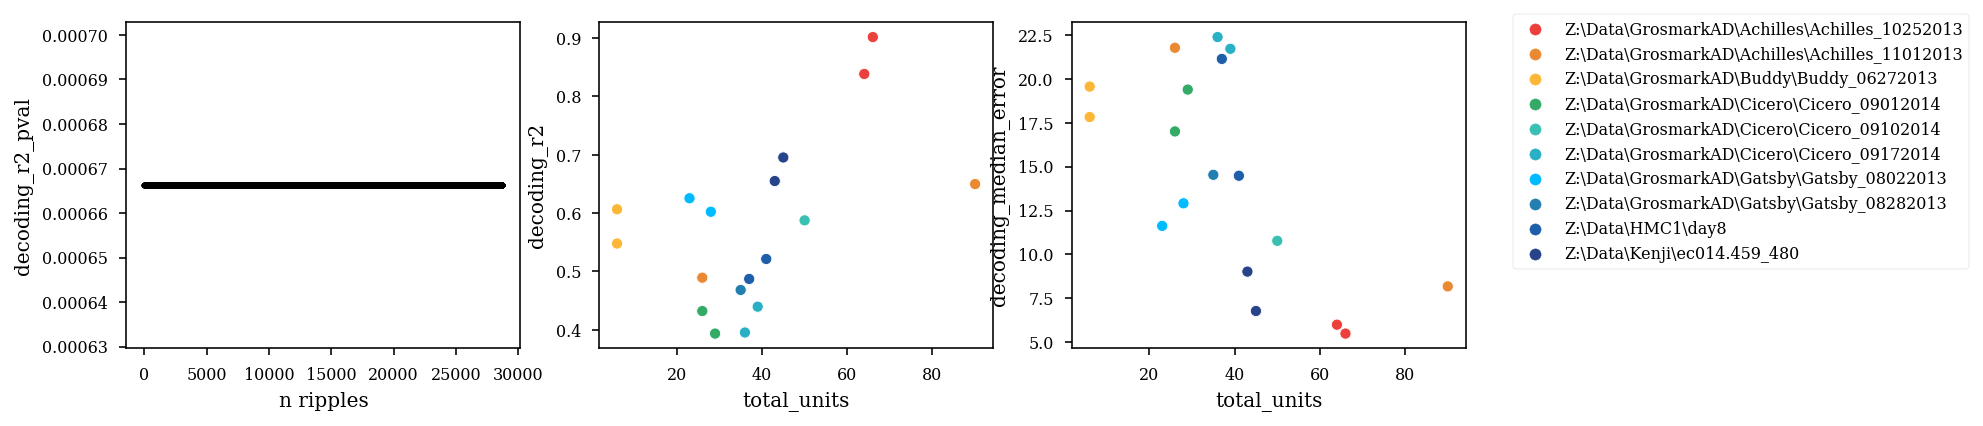

In [113]:
fig,axs = plt.subplots(1,3,figsize=(12,3))
axs[0].plot(df.decoding_r2_pval,'.k')
axs[0].set_ylabel('decoding_r2_pval')
axs[0].set_xlabel('n ripples')

sns.scatterplot(x="total_units", y="decoding_r2",
                hue="basepath",
                data=df, ax=axs[1],legend=False)                                                                                                       

sns.scatterplot(x="total_units", y="decoding_median_error",
                hue="basepath",                                                               
                data=df, ax=axs[2])
axs[2].legend(bbox_to_anchor=(1.1, 1.05))


In [68]:
print(df[df.decoding_r2_pval > 0.05].basepath.unique())
print(df[df.decoding_median_error > 30].basepath.unique())


['Z:\\Data\\AYAold\\AYA4\\day150804']
['Z:\\Data\\AYAold\\AYA4\\day150804' 'Z:\\Data\\AYAold\\AYA7\\day19']


In [114]:
alpha = 0.05
print('n ripples',df.shape[0])
print('pass by col swap',sum(df['score_pval_col_cycle'] < alpha))

print(df[df['score_pval_col_cycle'] < alpha].basepath.value_counts())
print('')
print('pass by time swap',sum(df['score_pval_time_swap'] < alpha))
print(df[df['score_pval_time_swap'] < alpha].basepath.value_counts())
print('')
print('pass by time swap & col swap',sum((df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)))
print(df[(df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)].basepath.value_counts())
# df[(df['score_pval_time_swap'] < alpha) & (df['score_pval_col_cycle'] < alpha)].basepath.value_counts().plot(kind='barh')

n ripples 28748
pass by col swap 3010
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    456
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    450
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014        418
Z:\Data\HMC1\day8                                414
Z:\Data\Kenji\ec014.459_480                      341
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013        326
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        267
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014        194
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013        141
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013            3
Name: basepath, dtype: int64

pass by time swap 1567
Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    322
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013    251
Z:\Data\Kenji\ec014.459_480                      223
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014        185
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014        175
Z:\Data\HMC1\day8                                122
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013        117
Z:\Data\

## Counts for forward and reverse replay by epoch

Here, I'm using score_pval_time_swap instead of score_pval_col_cycle. 

score_pval_time_swap enforces a spatial trajectory across the maze, while stationary events will still pass score_pval_col_cycle


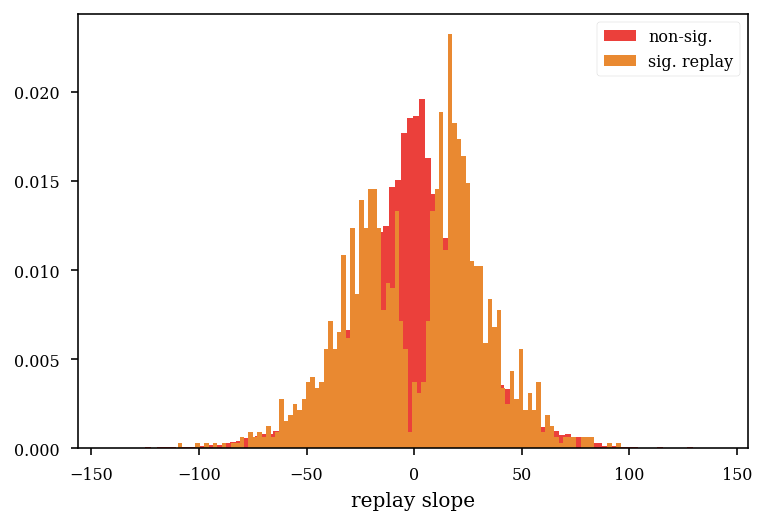

In [115]:
plt.hist(df[df.score_pval_time_swap > 0.05].slope,100,density=True,label='non-sig.')
plt.hist(df[df.score_pval_time_swap < 0.05].slope,100,density=True,label='sig. replay')
plt.legend()
plt.xlabel('replay slope')
plt.show()

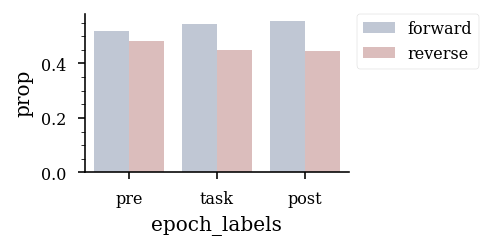

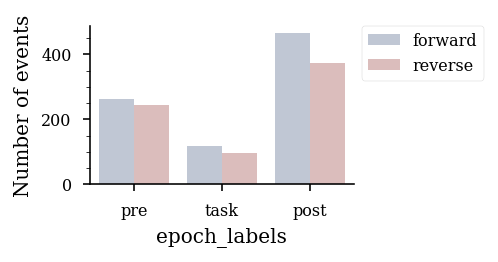

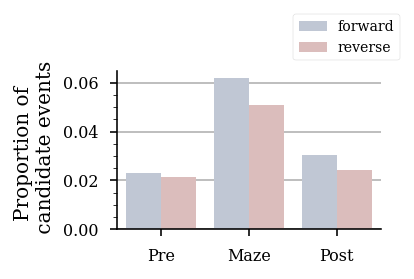

In [121]:
from matplotlib.ticker import AutoMinorLocator

alpha = 0.05

n_forward = [sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'forward') & (df.epoch == 'pre_sleep')),
                sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'forward') & (df.epoch == 'linear')),
                sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'forward') & (df.epoch == 'post_sleep'))
            ]
n_reverse = [sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'reverse') & (df.epoch == 'pre_sleep')),
                sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'reverse') & (df.epoch == 'linear')),
                sum((df.score_pval_time_swap < alpha) & (df.replay_type == 'reverse') & (df.epoch == 'post_sleep'))
            ]
total = [sum((df.score_pval_time_swap < alpha) & (df.epoch == 'pre_sleep')),
            sum((df.score_pval_time_swap < alpha) & (df.epoch == 'linear')),
            sum((df.score_pval_time_swap < alpha) & (df.epoch == 'post_sleep'))
        ]
total_all = [sum((df.epoch == 'pre_sleep')),
            sum((df.epoch == 'linear')),
            sum((df.epoch == 'post_sleep'))
        ]
prop_df = pd.DataFrame()

prop_df['counts'] = np.hstack([n_forward,n_reverse])
prop_df['total'] = np.hstack([total,total])
prop_df['prop'] = prop_df['counts'] / prop_df['total']
# prop_df['total_prop'] = prop_df['counts'] / np.sum(prop_df['total'])
prop_df['total_prop'] = prop_df['counts'] / np.hstack([total_all,total_all])

prop_df['replay_labels'] = ['forward','forward','forward','reverse','reverse','reverse']
prop_df['epoch_labels'] = ['pre','task','post','pre','task','post']

plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1,1)))
ax = plt.gca()
sns.barplot(data=prop_df,x="epoch_labels", y="prop", hue="replay_labels", palette="vlag", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(bbox_to_anchor=(1, 1.05))

plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1,1)))
ax = plt.gca()
sns.barplot(data=prop_df,x="epoch_labels", y="counts", hue="replay_labels", palette="vlag", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(bbox_to_anchor=(1, 1.05))
ax.set_ylabel('Number of events')
plt.savefig(os.path.join(fig_save_path,'forward_reverse_counts_per_session.svg'),dpi=300,bbox_inches='tight')

plt.figure(figsize=functions.set_size('thesis', fraction=.4, subplots=(1,1)))
ax = plt.gca()
sns.barplot(data=prop_df,x="epoch_labels", y="total_prop", hue="replay_labels", palette="vlag", ax=ax)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(bbox_to_anchor=(1, 1.05))
ax.set_ylabel('Proportion of \n candidate events')
ax.set_xlabel('')
ax.set_xticklabels(['Pre','Maze','Post'])

ax.legend(bbox_to_anchor=(1.1, 1.4),fontsize=7)
# ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.yaxis.grid()
plt.savefig(os.path.join(fig_save_path,'forward_reverse_total_prop_per_session.svg'),dpi=300,bbox_inches='tight',transparent=True)


## Show some replay and non replay examples

In [ ]:
forward_path = os.path.join(fig_save_path,'replay_examples','forward')                                        
reverse_path = os.path.join(fig_save_path,'replay_examples','reverse')                                        
        
if not os.path.isdir(forward_path):
        os.mkdir(forward_path)  
if not os.path.isdir(reverse_path):
        os.mkdir(reverse_path) 

sessions = glob.glob(save_path +os.sep+ '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

        basepath = results['outbound_epochs']['session']
        animal_name = loading.get_animal_id(basepath)
        basename = os.path.basename(basepath)
        idx = np.where((results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                        (results['outbound_epochs']['df'].replay_type == 'forward'))[0]
        if len(idx) > 0:
            ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                                    results['outbound_epochs']['sta_placecells'],
                                                    results['outbound_epochs']['tc'],
                                                    results['outbound_epochs']['tc'],
                                                    vmax=.1)
            fig.savefig(os.path.join(fig_save_path,'replay_examples',forward_path,basename+'_'+animal_name+'_.png'),dpi=300,bbox_inches='tight')
            plt.close(fig)      

        idx = np.where((results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                        (results['inbound_epochs']['df'].replay_type == 'forward'))[0]
        if len(idx) > 0:
            ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                                    results['inbound_epochs']['sta_placecells'],
                                                    results['inbound_epochs']['tc'],
                                                    results['inbound_epochs']['tc'],
                                                    vmax=.1)
            fig.savefig(os.path.join(fig_save_path,'replay_examples',forward_path,basename+'_'+animal_name+'1_.png'),dpi=300,bbox_inches='tight')
            plt.close(fig)  

        idx = np.where((results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                        (results['outbound_epochs']['df'].replay_type == 'reverse'))[0]
        if len(idx) > 0:
            ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                                    results['outbound_epochs']['sta_placecells'],
                                                    results['outbound_epochs']['tc'],
                                                    results['outbound_epochs']['tc'],
                                                    vmax=.1)
            fig.savefig(os.path.join(fig_save_path,'replay_examples',reverse_path,basename+'_'+animal_name+'_.png'),dpi=300,bbox_inches='tight')
            plt.close(fig)  

        idx = np.where((results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                        (results['inbound_epochs']['df'].replay_type == 'reverse'))[0]
        if len(idx) > 0:
            ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                                    results['inbound_epochs']['sta_placecells'],
                                                    results['inbound_epochs']['tc'],
                                                    results['inbound_epochs']['tc'],
                                                    vmax=.1)
            fig.savefig(os.path.join(fig_save_path,'replay_examples',reverse_path,basename+'_'+animal_name+'1_.png'),dpi=300,bbox_inches='tight')
            plt.close(fig)   

In [16]:
session = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay\Z__Data_GrosmarkAD_Achilles_Achilles_10252013.pkl'
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
with open(session, 'rb') as f:
    results = pickle.load(f)

temp_df = df[(df.basepath == basepath)]    
idx = np.where((temp_df['score_pval_col_cycle'] < 0.05))[0][0:30]
temp_df[temp_df['score_pval_col_cycle'] < 0.05]

epoch_df = loading.load_epoch(basepath)
pattern_idx,_ = functions.find_epoch_pattern(epoch_df.environment,['sleep','linear','sleep'])
epoch_df = epoch_df[pattern_idx]

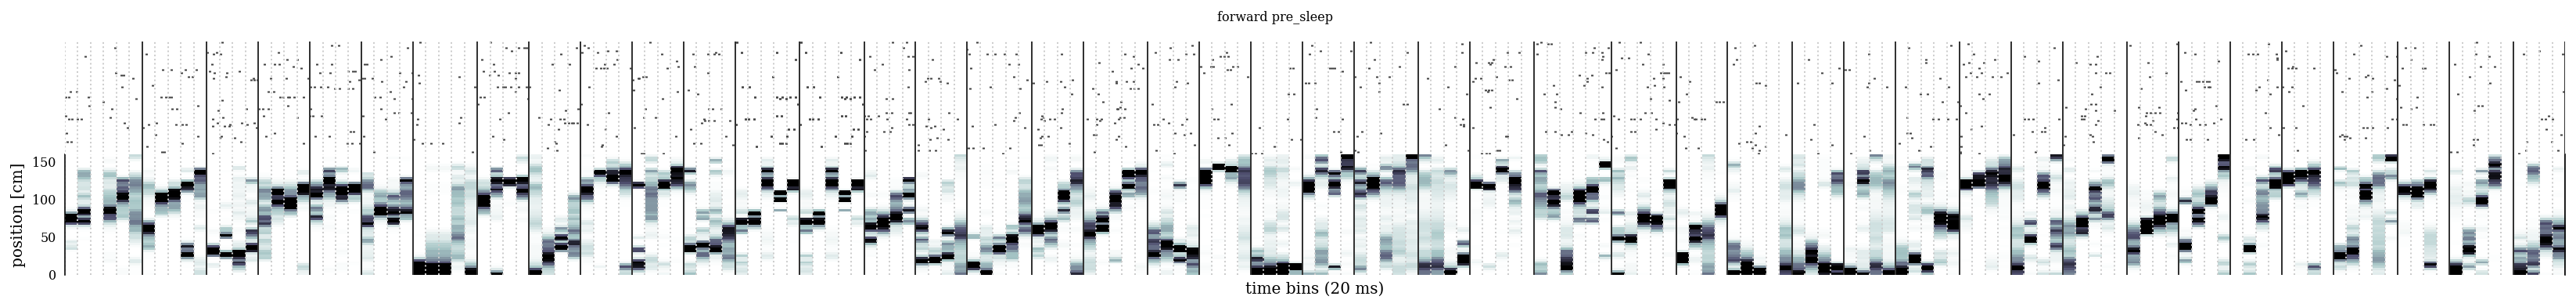

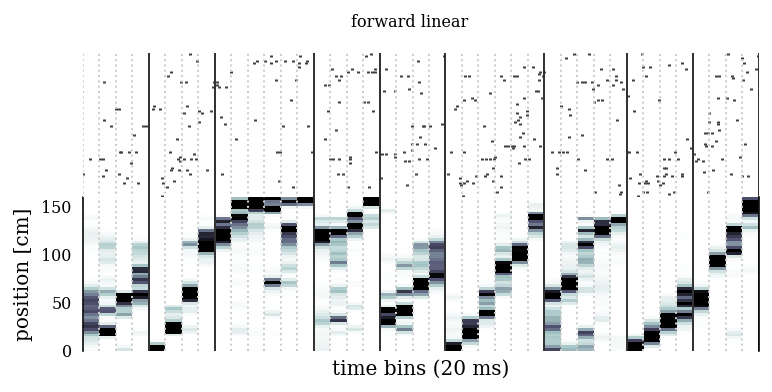

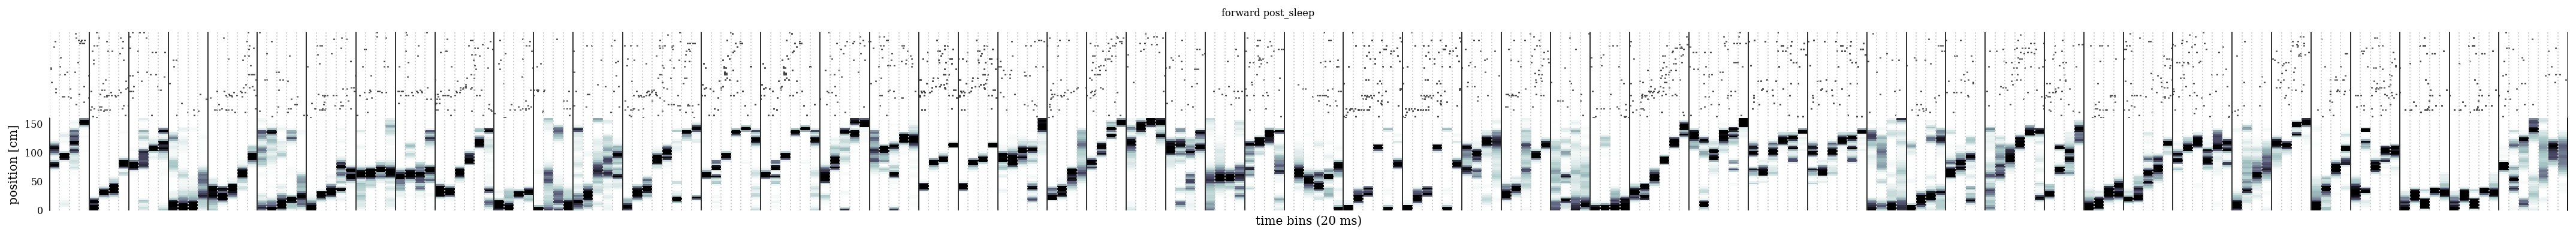

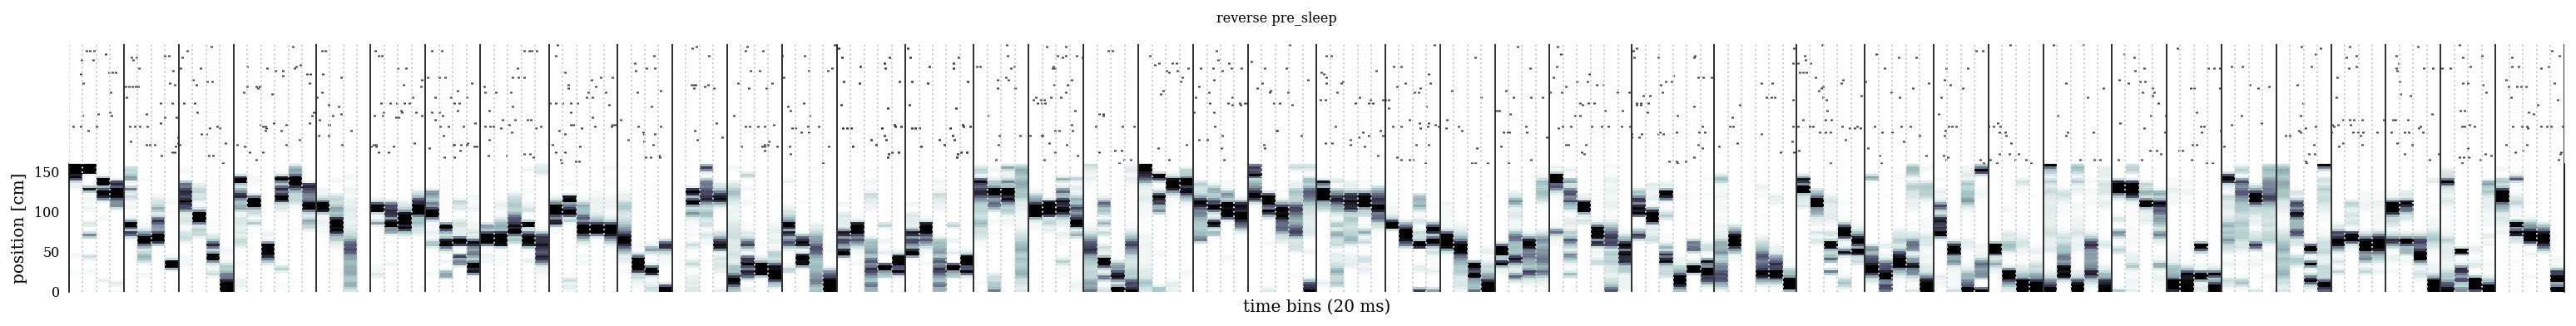

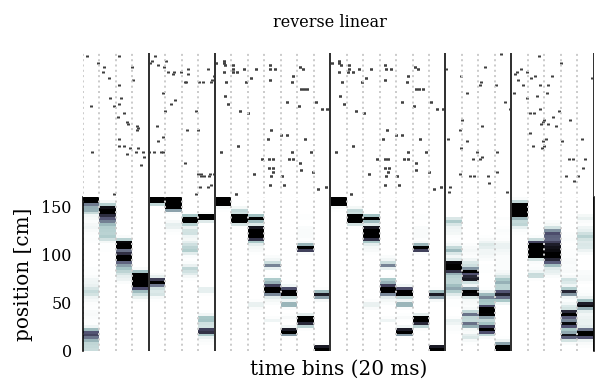

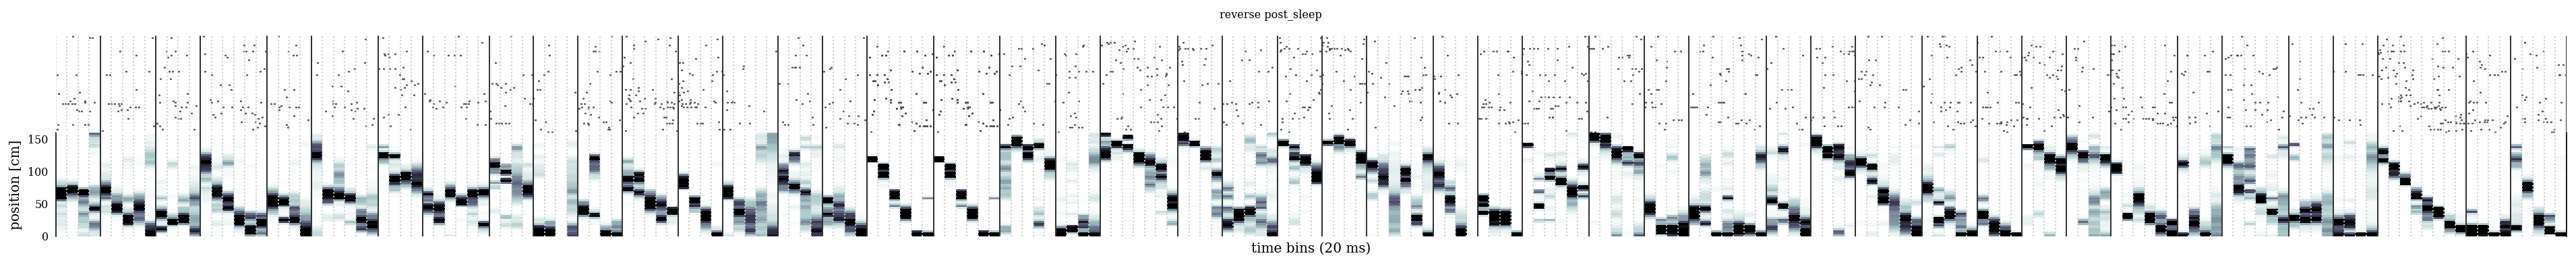

In [17]:
import warnings
warnings.filterwarnings("ignore")
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['outbound_epochs']['df'].loc[results['outbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results['inbound_epochs']['df'].loc[results['inbound_epochs']['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'linear') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward linear")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'forward') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward post_sleep")



idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse pre_sleep")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'linear') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse linear")

idx = np.where(
                (results['inbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['inbound_epochs']['df'].replay_type == 'reverse') &
                (results['inbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['inbound_epochs']['bst_placecells'][idx],
                                        results['inbound_epochs']['sta_placecells'],
                                        results['inbound_epochs']['tc'],
                                        results['inbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse post_sleep")

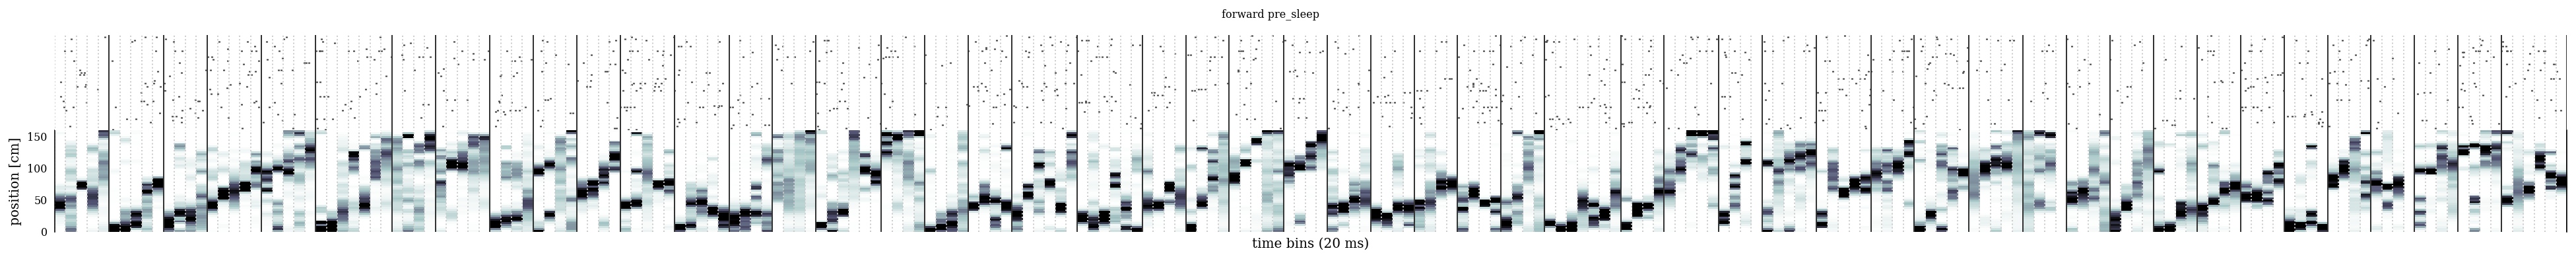

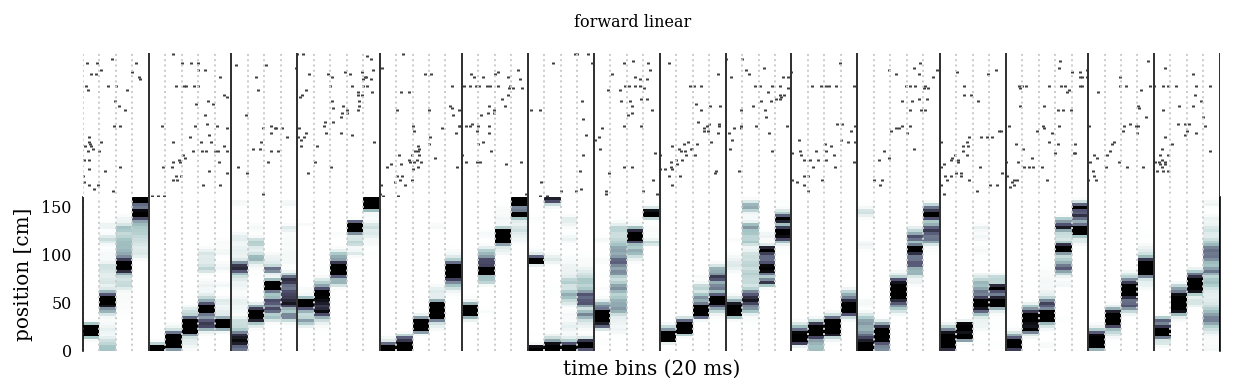

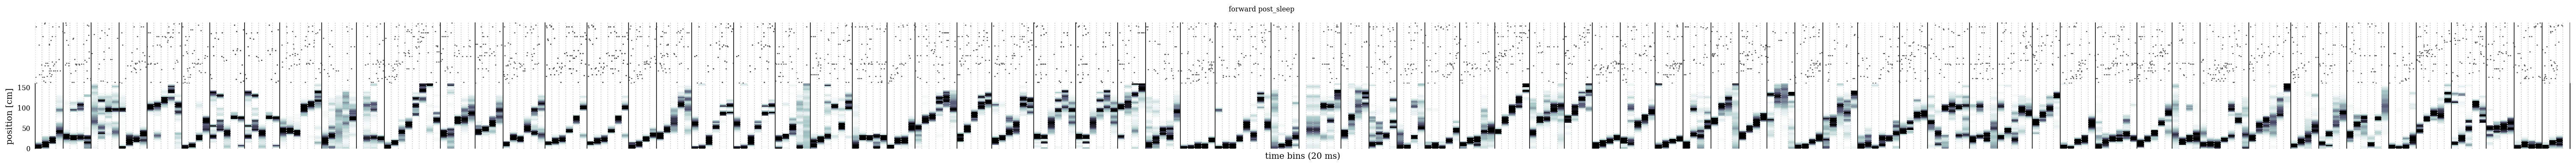

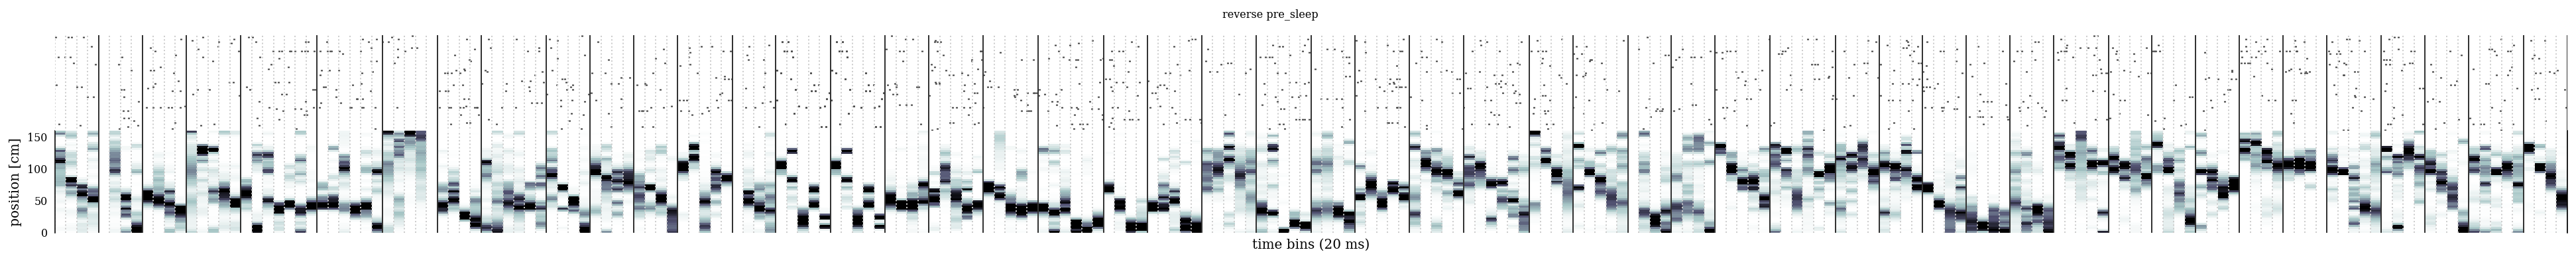

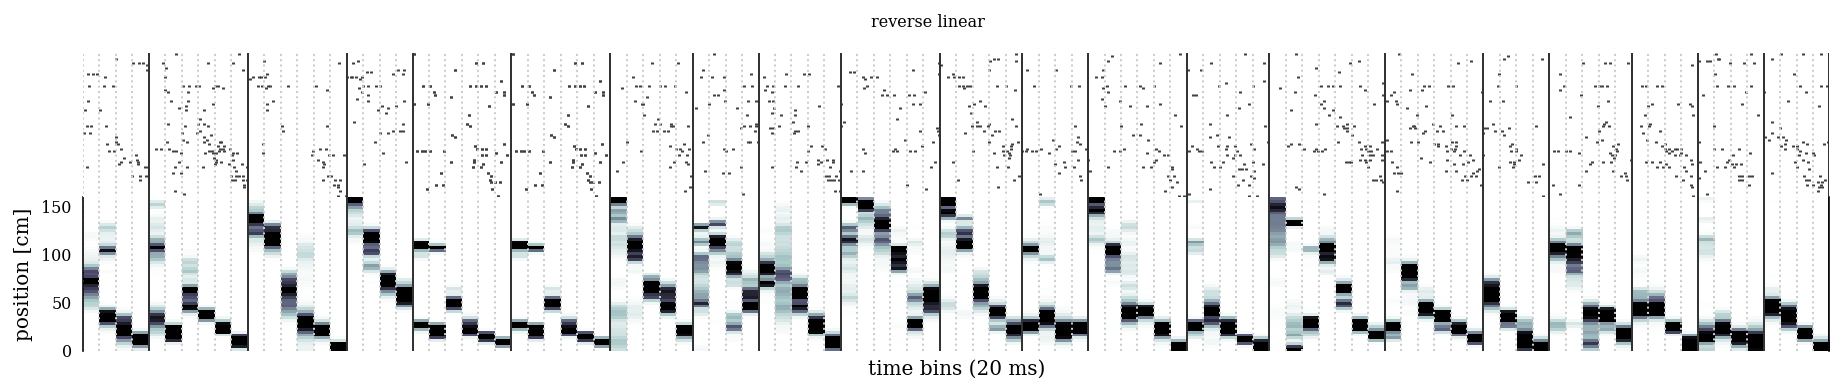

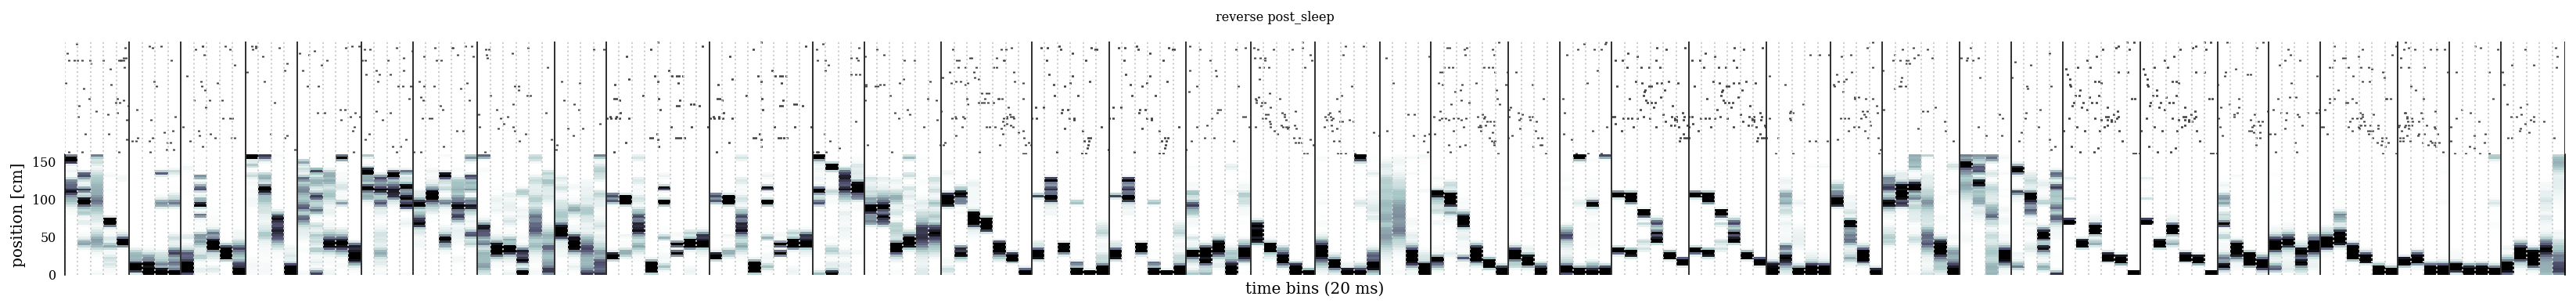

In [18]:
idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'forward') &
                (results['outbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward pre_sleep")

idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'forward') &
                (results['outbound_epochs']['df'].epoch == 'linear') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward linear")

idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'forward') &
                (results['outbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="forward post_sleep")



idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'reverse') &
                (results['outbound_epochs']['df'].epoch == 'pre_sleep') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse pre_sleep")

idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'reverse') &
                (results['outbound_epochs']['df'].epoch == 'linear') 
            )[0]
ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse linear")

idx = np.where(
                (results['outbound_epochs']['df'].score_pval_col_cycle < 0.05) &
                (results['outbound_epochs']['df'].replay_type == 'reverse') &
                (results['outbound_epochs']['df'].epoch == 'post_sleep') 
            )[0]

ax,fig = replay_fig.plot_all_replay(results['outbound_epochs']['bst_placecells'][idx],
                                        results['outbound_epochs']['sta_placecells'],
                                        results['outbound_epochs']['tc'],
                                        results['outbound_epochs']['tc'],
                                        vmax=.1,
                                        title_str="reverse post_sleep")

## get single session examples

In [24]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[2], 'rb') as f:
    results = pickle.load(f)

basepath = results['outbound_epochs']['session']
print(basepath)
# 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
temp_df = df[(df.basepath == basepath)]    
directions = temp_df.direction.unique()
n_sig = [sum((temp_df['score_pval_col_cycle'] < 0.05) & (temp_df['direction'] == directions[0])),
    sum((temp_df['score_pval_col_cycle'] < 0.05) & (temp_df['direction'] == directions[1]))]
direction = directions[np.argmax(n_sig)]
print(direction)

ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
epoch_df = loading.load_epoch(results[direction]['df'].basepath.unique()[0])
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
st = results[direction]['sta_placecells']

# pre task ripple participation prob
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre_ripple = functions.get_participation(st.data,starts,stops)
unit_partic_pre_task = particip_mat_pre_ripple.mean(axis=1)

Z:\Data\GrosmarkAD\Achilles\Achilles_10252013
outbound_epochs


## Tuning curve snake plot

In [23]:
# results[direction]['sta_placecells']
# basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'
# epoch_df = epoch_df[(epoch_df.stopTime - epoch_df.startTime)/60 > 5]
# beh_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
# pos,outbound_epochs,inbound_epochs = replay_run.handle_behavior(basepath,epoch_df,beh_epochs)


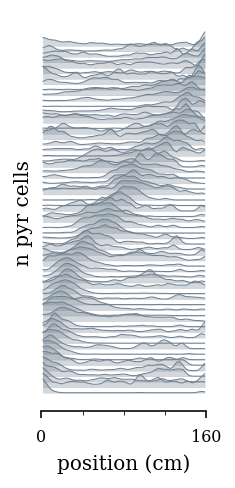

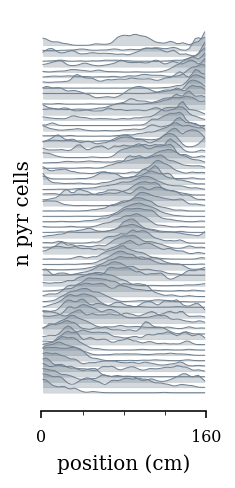

In [41]:
import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator

tc = results[direction]['tc'].reorder_units()

w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))

npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

    plt.savefig(os.path.join(fig_save_path,'place_cell_snake_example.svg'),dpi=300,bbox_inches='tight')

tc = results['inbound_epochs']['tc'].reorder_units()

w,h = functions.set_size('thesis', fraction=.25, subplots=(4,1))

npl.set_palette(npl.colors.rainbow)
with npl.FigureManager(show=True, figsize=(w,h)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)
    ax1 = npl.plot_tuning_curves1D(tc, normalize=True, pad=.4,fill=True,color='slategrey')
    leg_lines = ax1.get_lines()
    plt.setp(leg_lines, linewidth=.5)
    ax.set_xlabel('position (cm)')
    ax.set_ylabel('n pyr cells')
    # ax.set_yticks([0,tc.ratemap.shape[0]])
    ax.set_yticks([])
    ax.set_xticks([0,tc.bins.max()])

    ax.xaxis.set_minor_locator(AutoMinorLocator())

In [151]:
basepath = results[direction]['session']
epoch_df = loading.load_epoch(basepath)
behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])

results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[0],epoch_df.stopTime[0]),'epoch'] = 'pre_sleep'
results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[1],epoch_df.stopTime[1]),'epoch'] = 'linear'
results[direction]['df'].loc[results[direction]['df'].start.between(epoch_df.startTime[2],epoch_df.stopTime[2]),'epoch'] = 'post_sleep'


## get std of pre task rip participation for each sig replay event

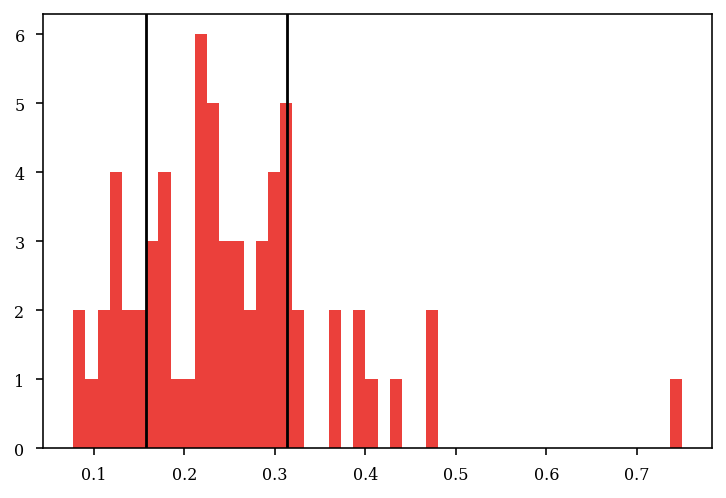

In [152]:
plt.hist(unit_partic_pre_task,50)
plt.axvline(np.percentile(unit_partic_pre_task,20),color='k')

plt.axvline(np.percentile(unit_partic_pre_task,80),color='k')
plt.show()

In [36]:
particip_mat = functions.get_participation(st.data,results[direction]['df'].start.values,results[direction]['df'].stop.values)

par_std = []
par_sem = []
n_active_check = []
par_median = []
par_mean = []
low_par_percent = []
for event in particip_mat.T:
    values = unit_partic_pre_task[event == 1]

    low_par_percent.append(sum(values < np.percentile(unit_partic_pre_task,20)) / len(values))

    par_std.append(np.std(values))
    par_sem.append(np.std(values)/np.sqrt(len(values)))
    n_active_check.append(len(values))
    par_median.append(np.median(values))
    par_mean.append(np.mean(values))

results['df']['par_std'] = np.hstack(par_std)
results['df']['par_sem'] = np.hstack(par_sem)
results['df']['n_active_check'] = np.hstack(n_active_check)
results['df']['par_median'] = np.hstack(par_median)
results['df']['par_mean'] = np.hstack(par_mean)
results['df']['low_par_percent'] = np.hstack(low_par_percent)


KeyError: 'df'

In [365]:
results['df'].keys()

Index(['start', 'stop', 'peaks', 'amplitude', 'duration', 'frequency',
       'detectorName', 'ripple_channel', 'event_spk_thres', 'basepath',
       'basename', 'animal', 'n_active', 'inactive_bin_prop',
       'trajectory_score', 'r_squared', 'slope', 'intercept',
       'score_pval_time_swap', 'score_pval_col_cycle', 'traj_dist',
       'traj_speed', 'traj_step', 'replay_type', 'dist_rat_start',
       'dist_rat_end', 'epoch', 'par_std', 'par_sem', 'n_active_check',
       'replay', 'par_median', 'par_mean', 'low_par_percent'],
      dtype='object')

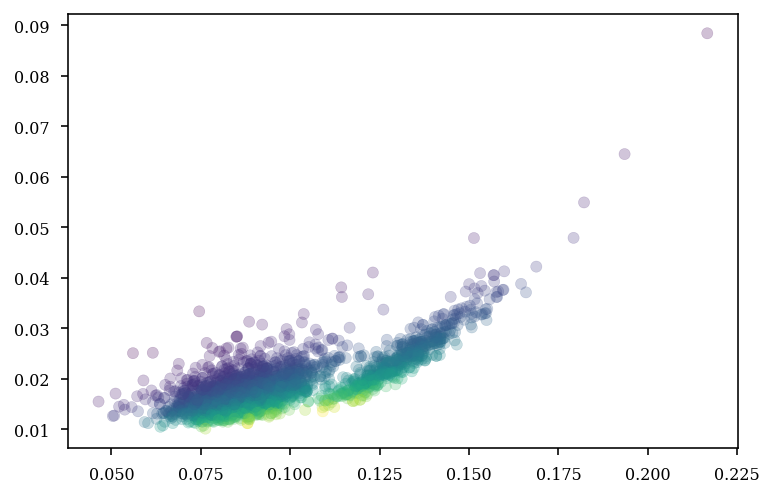

In [367]:
plt.scatter(results['df'].par_std,results['df'].par_sem,c=results['df'].n_active_check,alpha=.25)
# plt.yscale('log')
# plt.scatter(results['df'].n_active_check,results['df'].n_active,alpha=.25)


In [351]:
results['df']['replay'] = False

results['df'].loc[results['df']['score_pval_col_cycle'] < 0.05,'replay'] = True

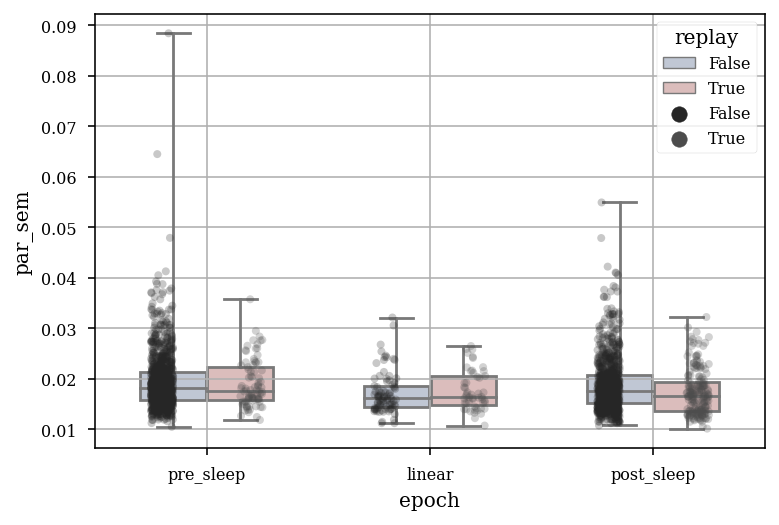

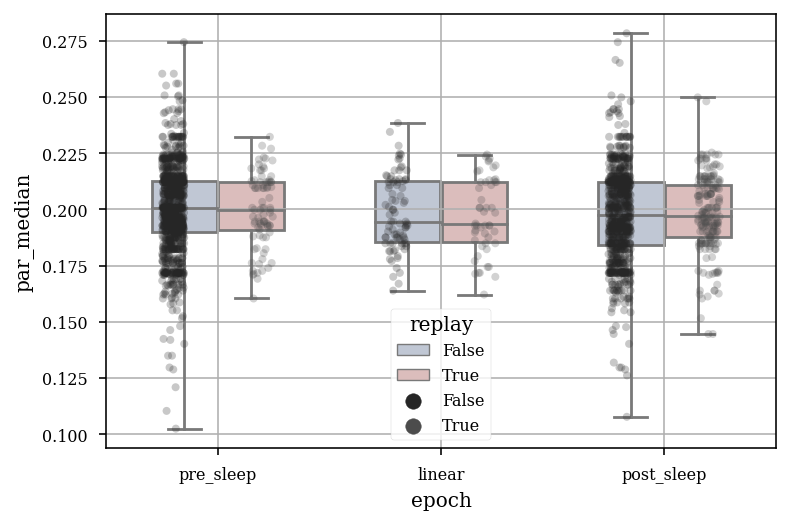

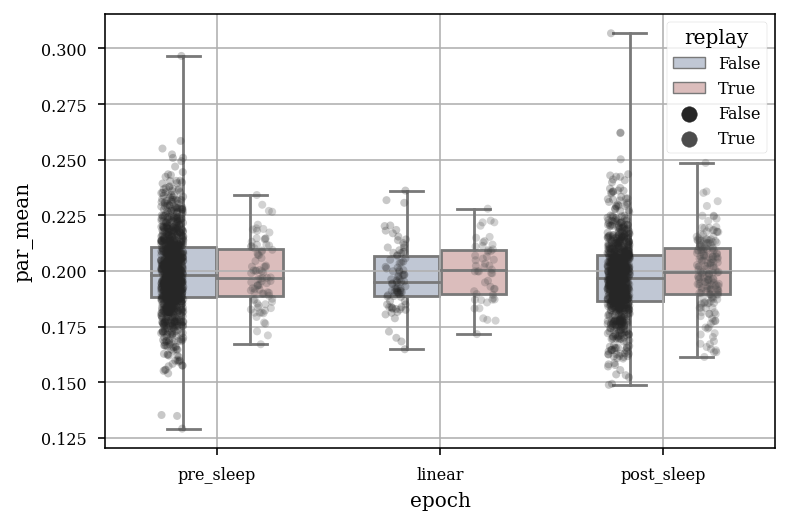

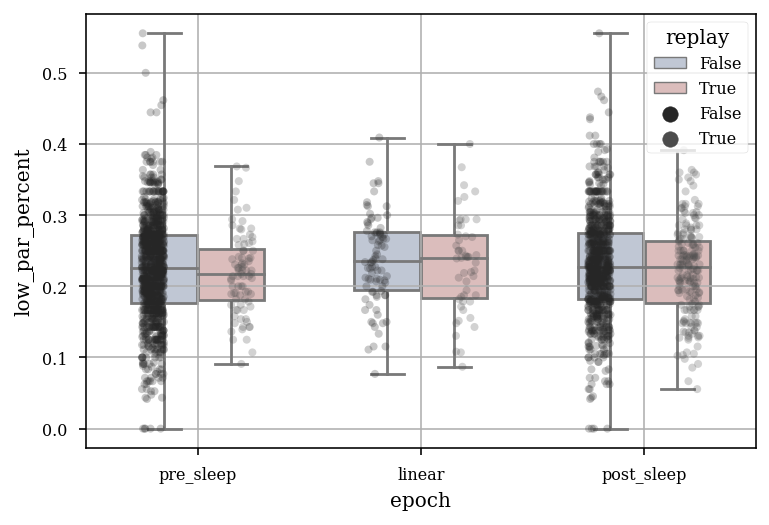

In [370]:
# plt.figure()

# sns.histplot(
#     results['df'],
#     x="par_std", hue="epoch",
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )

# plt.figure()

# sns.histplot(
#     results['df'],
#     x="par_sem", hue="epoch",
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )
alpha = 0.05
results['df']['replay'] = False
results['df'].loc[results['df']['score_pval_col_cycle'] < alpha,'replay'] = True

plt.figure()
sns.boxplot(x="epoch", y="par_sem",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_sem",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
# plt.yscale('log')
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="par_median",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_median",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="par_mean",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="par_mean",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()

plt.figure()
sns.boxplot(x="epoch", y="low_par_percent",hue='replay', data=results['df'],
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="epoch", y="low_par_percent",hue='replay', data=results['df'],
              size=4, color=".3", linewidth=0,dodge=True,alpha=.25)
plt.grid()
# plt.figure()
# sns.histplot(
#     results['df'],
#     x="par_std", hue=results['df']['score_pval_col_cycle'] < 0.05,
#     edgecolor=".3",
#     linewidth=.5,common_bins=True,common_norm=False,kde=True,element="step",stat="density"
# )
# plt.axvline(0.105,color='k')

In [ ]:
vars = ["amplitude", "duration", "frequency",
        "n_active","inactive_bin_prop","trajectory_score",
        "r_squared","slope","score_pval_time_swap",
        "score_pval_col_cycle","traj_dist","traj_speed","traj_step","par_std"]

ax = sns.pairplot(results['df'],hue='epoch',corner=True,
        x_vars=vars,y_vars=vars)

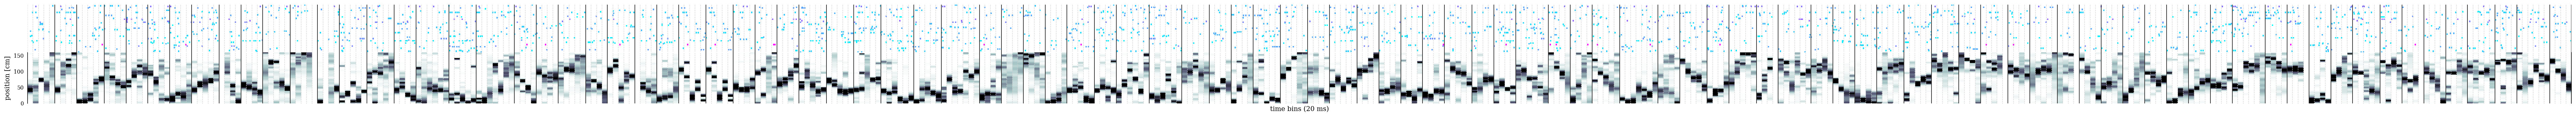

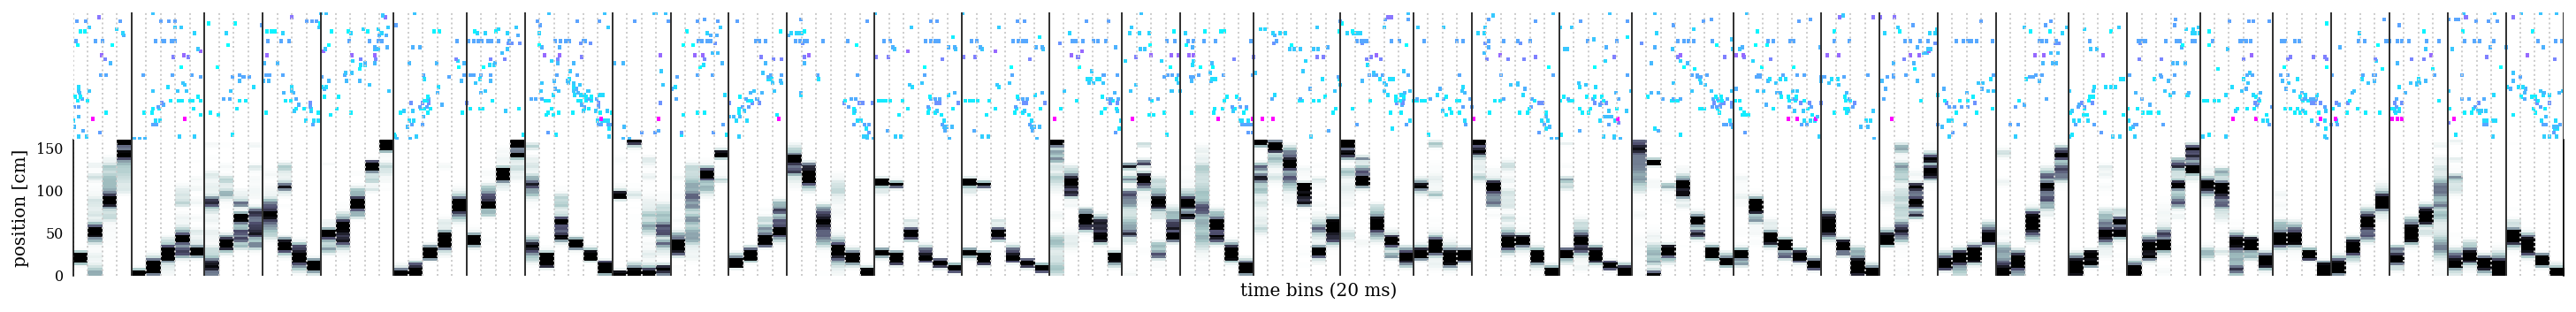

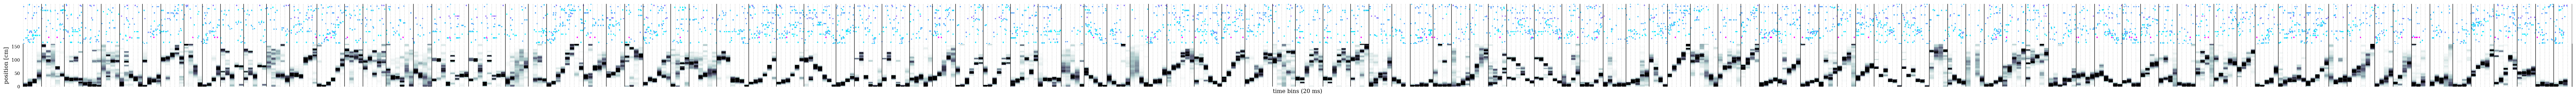

In [178]:
alpha = 0.05
importlib.reload(replay_fig)
idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha) &
    (results[direction]['df']['epoch'] == 'pre_sleep')
    )[0]

ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
# color_scale_vector=np.log10(unit_partic_pre_task),

idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha) &
    (results[direction]['df']['epoch'] == 'linear')
    )[0]

ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)

idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha) &
    (results[direction]['df']['epoch'] == 'post_sleep')
    )[0]

ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)

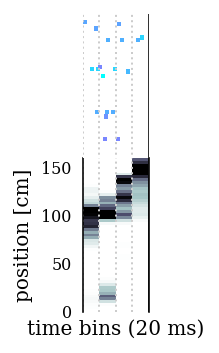

In [173]:
importlib.reload(replay_fig)

# idx = np.where(results['df']['score_pval_col_cycle'] < 0.01)[0][-20:]

idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < alpha) &
    (results[direction]['df']['epoch'] == 'pre_sleep')
    )[0][52]

ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][int(idx)],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)

fig.savefig(os.path.join(fig_save_path,'pre_task_replay_example.svg'),dpi=300,bbox_inches='tight')


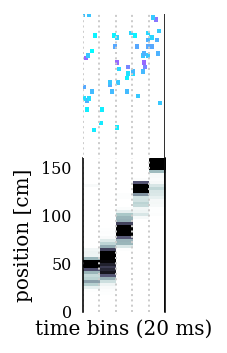

In [174]:
idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < 0.05) &
    (results[direction]['df']['epoch'] == 'linear')
    )[0][4]

ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][int(idx)],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
fig.savefig(os.path.join(fig_save_path,'task_replay_example.svg'),dpi=300,bbox_inches='tight')


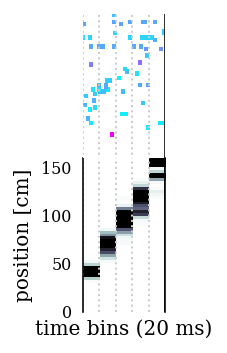

In [175]:
idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < 0.05) &
    (results[direction]['df']['epoch'] == 'post_sleep')
    )[0][70]

idx = int(idx)
ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=unit_partic_pre_task,
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True)
fig.savefig(os.path.join(fig_save_path,'post_task_replay_example.svg'),dpi=300,bbox_inches='tight')

In [194]:
# plt.cm.cool
# plt.get_cmap('cool')

# norm = plt.Normalize()
# colors = plt.get_cmap('cool')(norm(unit_partic_pre_task))
# colors

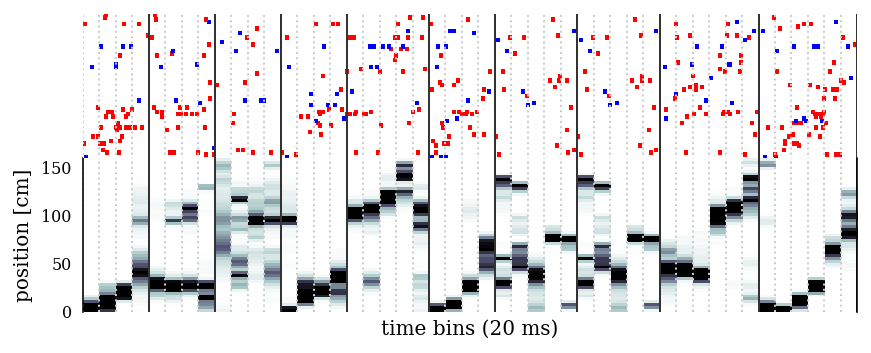

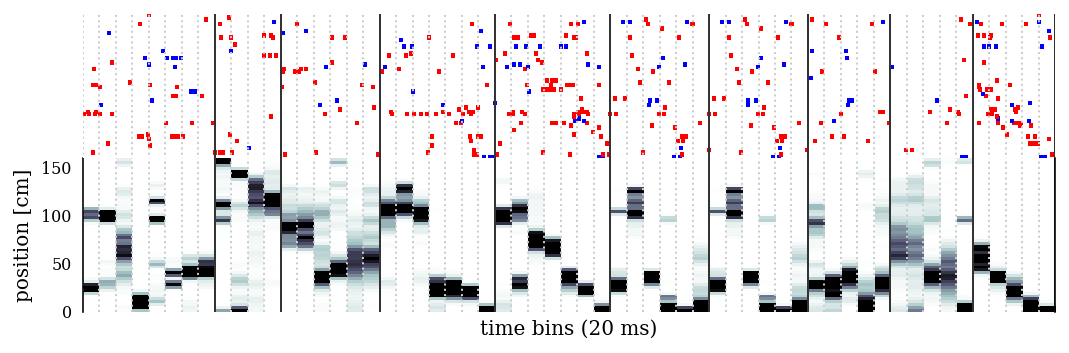

In [216]:
importlib.reload(replay_fig)
idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < 0.05) &
    (results[direction]['df']['epoch'] == 'post_sleep') & 
    (results[direction]['df']['replay_type'] == 'forward')
    )[0][0:10]

# idx = int(idx)
ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=results[direction]['cell_metrics'].deepSuperficial == 'Deep',
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True,
                                        cmap='bwr')
idx = np.where(
    (results[direction]['df']['score_pval_col_cycle'] < 0.05) &
    (results[direction]['df']['epoch'] == 'post_sleep') & 
    (results[direction]['df']['replay_type'] == 'reverse')
    )[0][10:20]

# idx = int(idx)
ax,fig = replay_fig.plot_all_replay(results[direction]['bst_placecells'][idx],
                                        results[direction]['sta_placecells'],
                                        results[direction]['tc'],
                                        results[direction]['tc'],
                                        vmax=.1,
                                        title_str="",
                                        custom_raster_color=True,
                                        color_scale_vector=results[direction]['cell_metrics'].deepSuperficial == 'Deep',
                                        raster_lw=2,
                                        raster_lh=2,
                                        rasterized_heatmap=True,
                                        cmap='bwr')


## Demonstrate that sig replay events benifit from recruiting units with low ripple participation probability

In [122]:
def shuffle_matrices(A,B,n_shuffles=1500):
    """
    shuffle_matrices: takes two matrices (A,B) with same n rows
        and randomly exchanges columns n_shuffles times
    """
    a_partic_shuff = np.zeros((A.shape[0],n_shuffles))
    b_partic_shuff = np.zeros_like(a_partic_shuff)

    for shuff_i in range(n_shuffles):
        # find number of columns to exchange based on the smallest matrix
        n_rearange = np.min([A.shape[1],B.shape[1]])
        # get n_rearange number of random columns to exchange scaled to each matrix
        idx_a = random.sample(range(0, A.shape[1]),n_rearange)
        idx_b = random.sample(range(0, B.shape[1]),n_rearange)
        # make copy of matrice to manipulate
        temp_a = A.copy()
        temp_b = B.copy()
        # use random column index to exchange columns between matrices
        temp_a[:,idx_a] = B[:,idx_b]
        temp_b[:,idx_b] = A[:,idx_a]
        # calculate participation prob. and save
        a_partic_shuff[:,shuff_i] = temp_a.mean(axis=1)
        b_partic_shuff[:,shuff_i] = temp_b.mean(axis=1)
    return a_partic_shuff,b_partic_shuff

def shuffle_matrices_v2(A,B,n_shuffles=1500):
    """
    shuffle_matrices: takes two matrices (A,B) with same n rows
        and randomly exchanges columns n_shuffles times
    """
    a_partic_shuff = np.zeros((A.shape[0],n_shuffles))
    b_partic_shuff = np.zeros_like(a_partic_shuff)

    X = np.concatenate([A,B],axis=1)

    for shuff_i in range(n_shuffles):

        idx_a = random.sample(range(0, X.shape[1]),A.shape[1])
        idx_b = random.sample(range(0, X.shape[1]),B.shape[1])

        a_partic_shuff[:,shuff_i] = X[:,idx_a].mean(axis=1)
        b_partic_shuff[:,shuff_i] = X[:,idx_b].mean(axis=1)

    return a_partic_shuff,b_partic_shuff

In [ ]:
# alpha = 0.05
# df = df.sort_values(by=['basepath','start'])

# for basepath in df.basepath.unique():
#     save_file = os.path.join(save_path,basepath.replace(os.sep, "_").replace(":", "_")  + '.pkl')

#     with open(save_file, 'rb') as f:
#         results = pickle.load(f)

#     temp_df = df[df.basepath == basepath]

#     for direction in temp_df.direction.unique():
#         st = results[direction]['sta_placecells']
#         ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
#         epoch_df = loading.load_epoch(basepath)
#         behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
        
#         sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < alpha],
#                                             results['df'].stop[results['df'].score_pval_col_cycle < alpha]]).T])

#         non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > alpha],
#                                                     results['df'].stop[results['df'].score_pval_col_cycle > alpha]]).T])

In [123]:
alpha = 0.05
    
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

sessions = glob.glob(save_path +os.sep+ '*.pkl')
UID = []
unit_partic_post_sig_replay = []
unit_partic_pre_task = []
unit_partic_post_non_sig_replay = []
particip_mat_pre_ripple_shuff = []
particip_mat_post_replay_shuff = []
avg_fr_not_rip_pre_task = []
avg_fr_in_rip_pre_task = []
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    basepath = results['outbound_epochs']['session']
    for direction in results.keys():

        ripple_epochs = nel.EpochArray([np.array([results[direction]['df'].start,results[direction]['df'].stop]).T])
        epoch_df = loading.load_epoch(basepath)
        pattern_idx,_ = functions.find_epoch_pattern(epoch_df.environment,['sleep','linear','sleep'])
        epoch_df = epoch_df[pattern_idx]
        behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])
        st = results[direction]['sta_placecells']

        sig_idx = results[direction]['df'].score_pval_col_cycle > alpha
        sig_replay_epochs = nel.EpochArray([np.array([results[direction]['df'].start[sig_idx],
                                                    results[direction]['df'].stop[sig_idx]]).T])
        non_sig_idx = results[direction]['df'].score_pval_col_cycle > alpha
        non_sig_replay_epochs = nel.EpochArray([np.array([results[direction]['df'].start[non_sig_idx],
                                                    results[direction]['df'].stop[non_sig_idx]]).T])
        # post task replay participation prob.
        starts = sig_replay_epochs[behavioral_epochs[2]].starts
        stops = sig_replay_epochs[behavioral_epochs[2]].stops
        if len(starts) == 0:
            unit_partic_post_sig_replay.append(np.tile(np.nan,st.data.shape[0]))
            particip_mat_post_replay = np.tile(np.nan,[st.data.shape[0],len(starts)])
        else:
            particip_mat_post_replay = functions.get_participation(st.data,starts,stops)
            unit_partic_post_sig_replay.append(particip_mat_post_replay.mean(axis=1))

        # post task non-replay participation prob.
        starts = non_sig_replay_epochs[behavioral_epochs[2]].starts
        stops = non_sig_replay_epochs[behavioral_epochs[2]].stops
        if len(starts) == 0:
            unit_partic_post_non_sig_replay.append(np.tile(np.nan,st.data.shape[0]))
        else:
            particip_mat = functions.get_participation(st.data,starts,stops)
            unit_partic_post_non_sig_replay.append(particip_mat.mean(axis=1))

        # pre task ripple participation prob
        starts = ripple_epochs[behavioral_epochs[0]].starts
        stops = ripple_epochs[behavioral_epochs[0]].stops
        if len(starts) == 0:
            unit_partic_pre_task.append(np.tile(np.nan,st.data.shape[0]))
            particip_mat_pre_ripple = np.tile(np.nan,[st.data.shape[0],len(starts)])
        else:
            particip_mat_pre_ripple = functions.get_participation(st.data,starts,stops)
            unit_partic_pre_task.append(particip_mat_pre_ripple.mean(axis=1))

        if len(ripple_epochs) == 0:
            avg_fr_not_rip_pre_task.append(np.tile(np.nan,st.data.shape[0]))
            avg_fr_in_rip_pre_task.append(np.tile(np.nan,st.data.shape[0]))
        else:
            avg_fr_not_rip_pre_task.append(st[behavioral_epochs[0]][~ripple_epochs].n_spikes / st[behavioral_epochs[0]][~ripple_epochs].support.duration)
            avg_fr_in_rip_pre_task.append(st[behavioral_epochs[0]][ripple_epochs].n_spikes / st[behavioral_epochs[0]][ripple_epochs].support.duration)

        # shuffle identity from pre to post
        # a_shuff,b_shuff = shuffle_matrices(particip_mat_pre_ripple,particip_mat_post_replay)
        a_shuff,b_shuff = shuffle_matrices_v2(particip_mat_pre_ripple,particip_mat_post_replay)
        particip_mat_pre_ripple_shuff.append(a_shuff)
        particip_mat_post_replay_shuff.append(b_shuff)

        UID.append(results[direction]['cell_metrics'].UID)

pre_post_df = pd.DataFrame()
pre_post_df['UID'] = np.hstack(UID)
pre_post_df['avg_fr_not_rip_pre_task'] = np.hstack(avg_fr_not_rip_pre_task)
pre_post_df['avg_fr_in_rip_pre_task'] = np.hstack(avg_fr_in_rip_pre_task)

pre_post_df['unit_partic_pre_task'] = np.hstack(unit_partic_pre_task)
pre_post_df['unit_partic_post_sig_replay'] = np.hstack(unit_partic_post_sig_replay)
pre_post_df['unit_partic_post_non_sig_replay'] = np.hstack(unit_partic_post_non_sig_replay)

particip_mat_pre_ripple_shuff = np.vstack(particip_mat_pre_ripple_shuff)
particip_mat_post_replay_shuff = np.vstack(particip_mat_post_replay_shuff)

In [124]:
y = (
    (pre_post_df.unit_partic_post_sig_replay-pre_post_df.unit_partic_pre_task) /
    (pre_post_df.unit_partic_post_sig_replay+pre_post_df.unit_partic_pre_task)
    )
y = y.values
y_shuff = (
            (particip_mat_post_replay_shuff-particip_mat_pre_ripple_shuff) /
            (particip_mat_post_replay_shuff+particip_mat_pre_ripple_shuff)
            )
sig_event_idx, pvalues = functions.get_significant_events(y,y_shuff)

pre_post_df['pre_post_ratio_pvalues'] = pvalues
pre_post_df

UID  avg_fr_not_rip_pre_task  avg_fr_in_rip_pre_task  \
0      3                 1.215257                3.127299   
1      7                 1.442628                2.685798   
2     11                 0.414286                2.023547   
3     12                 1.364278                4.332230   
4     16                 0.880991                4.065489   
..   ...                      ...                     ...   
693   75                 0.558997                2.250514   
694   76                 0.549442                3.858025   
695   77                 2.597940                3.097136   
696   82                 1.829301                4.522462   
697   84                 2.224841               17.961248   

     unit_partic_pre_task  unit_partic_post_sig_replay  \
0                0.256206                     0.230686   
1                0.207447                     0.268770   
2                0.148050                     0.147987   
3                0.328014                     0.371055   
4                0.294326                     0.325354   
..                    ...                          ...   
693              0.202532                     0.526559   
694              0.291139                     0.314088   
695              0.233474                     0.139723   
696              0.388186                     0.444573   
697              0.746835                     0.555427   

     unit_partic_post_non_sig_replay  pre_post_ratio_pvalues  
0                           0.230686                0.054630  
1                           0.268770                0.000666  
2                           0.147987                0.997335  
3                           0.371055                0.003997  
4                           0.325354                0.039307  
..                               ...                     ...  
693                         0.526559                0.000666  
694                         0.314088                0.182545  
695                         0.139723                0.000666  
696                         0.444573                0.001999  
697                         0.555427                0.000666  

[698 rows x 7 columns]

In [125]:
pre_post_df = pre_post_df.dropna()

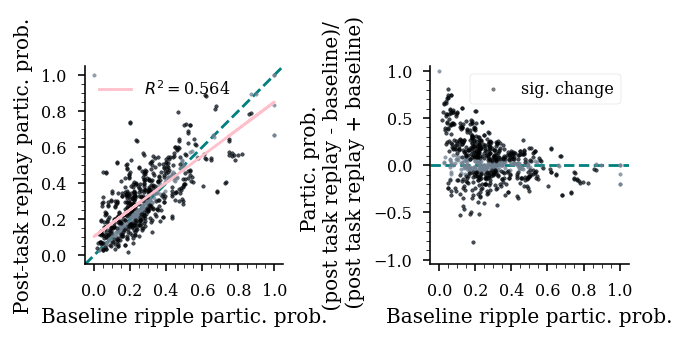

In [126]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

x,y = pre_post_df.unit_partic_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
axs[0].scatter(x[pre_post_df.pre_post_ratio_pvalues<0.05], y[pre_post_df.pre_post_ratio_pvalues<0.05],s=3,alpha=.5,color='k')

axs[0].plot(x,x*reg.coef_+reg.intercept_,
            color='pink',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

y = (
    (pre_post_df.unit_partic_post_sig_replay-pre_post_df.unit_partic_pre_task) /
    (pre_post_df.unit_partic_post_sig_replay+pre_post_df.unit_partic_pre_task)
    )
y = y.values

x = pre_post_df.unit_partic_pre_task.values
axs[1].scatter(x, y,s=3,alpha=.75,color='slategrey')
axs[1].scatter(x[pre_post_df.pre_post_ratio_pvalues<0.05], y[pre_post_df.pre_post_ratio_pvalues<0.05],s=3,color='k',alpha=.5,label='sig. change')

axs[1].set_xlim(-.05,1.05)
axs[1].set_ylim(-1.05,1.05)

axs[1].axhline(0,color='teal',ls='--',zorder=-100)
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_xticks(np.arange(0,1.1,.2))

axs[0].set_xlim(-.05,1.05)
axs[0].set_ylim(-.05,1.05)
axs[0].set_aspect('equal')
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='teal', ls='--',zorder=-100)
axs[0].set_xticks(np.arange(0,1.1,.2))
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline ripple partic. prob.')
axs[0].set_ylabel('Post-task replay partic. prob.')

axs[1].set_xlabel('Baseline ripple partic. prob.')
axs[1].set_ylabel('Partic. prob. \n (post task replay - baseline)/ \n (post task replay + baseline)')

axs[0].legend(frameon=False)
axs[1].legend(frameon=True)

plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post.svg'),dpi=300,bbox_inches='tight')


## look at baseline FR

No handles with labels found to put in legend.


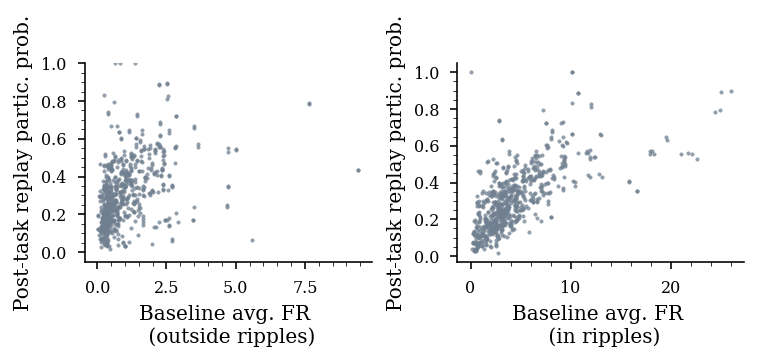

In [127]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.3)
axs = axs.ravel()

x,y = pre_post_df.avg_fr_not_rip_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
# axs[0].plot(x,x*reg.coef_+reg.intercept_,
#             color='k',
#             label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

axs[0].set_ylim(-.05,1)
axs[0].set_yticks(np.arange(0,1.1,.2))

x,y = pre_post_df.avg_fr_in_rip_pre_task,pre_post_df.unit_partic_post_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[1].scatter(x,y,s=3,alpha=.75,color='slategrey')
# axs[1].plot(x,x*reg.coef_+reg.intercept_,
#             color='k',
#             label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

axs[0].set_ylim(-.05,1)
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline avg. FR \n (outside ripples)')
axs[0].set_ylabel('Post-task replay partic. prob.')

axs[1].set_xlabel('Baseline avg. FR \n (in ripples)')
axs[1].set_ylabel('Post-task replay partic. prob.')
# axs[0].set_xscale('log')
axs[0].legend(frameon=False)

plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post_FR.svg'),dpi=300,bbox_inches='tight')


No handles with labels found to put in legend.


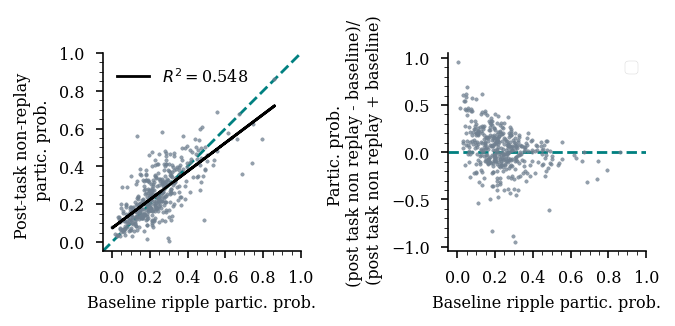

In [505]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

x,y = unit_partic_pre_task,unit_partic_post_non_sig_replay
reg = LinearRegression().fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=3,alpha=.75,color='slategrey')
axs[0].plot(x,x*reg.coef_+reg.intercept_,
            color='k',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))

y = (unit_partic_post_non_sig_replay-unit_partic_pre_task) / (unit_partic_post_non_sig_replay+unit_partic_pre_task)
# y_shuff = (
#             (particip_mat_post_replay_shuff-particip_mat_pre_ripple_shuff) /
#                 (particip_mat_post_replay_shuff+particip_mat_pre_ripple_shuff)
#             )
# sig_event_idx, pvalues = functions.get_significant_events(y,y_shuff.T)

x = unit_partic_pre_task
axs[1].scatter(x, y,s=3,alpha=.75,color='slategrey')
# axs[1].scatter(x[pvalues<0.05], y[pvalues<0.05],s=3,color='k',label='sig. change')

axs[1].set_xlim(-.05,1)
axs[1].set_ylim(-1.05,1.05)

axs[1].axhline(0,color='teal',ls='--',zorder=-100)
axs[1].set_aspect(1./axs[1].get_data_ratio())
axs[1].set_xticks(np.arange(0,1.1,.2))

axs[0].set_xlim(-.05,1)
axs[0].set_ylim(-.05,1)
axs[0].set_aspect('equal')
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='teal', ls='--',zorder=-100)
axs[0].set_xticks(np.arange(0,1.1,.2))
axs[0].set_yticks(np.arange(0,1.1,.2))

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
 
axs[0].set_xlabel('Baseline ripple partic. prob.',fontsize=8)
axs[0].set_ylabel('Post-task non-replay \n partic. prob.',fontsize=8)

axs[1].set_xlabel('Baseline ripple partic. prob.',fontsize=8)
axs[1].set_ylabel('Partic. prob. \n (post task non replay - baseline)/ \n (post task non replay + baseline)',fontsize=8)

axs[0].legend(frameon=False)
axs[1].legend(frameon=True)

# plt.savefig(os.path.join(fig_save_path,'rip_particip_replay_particip_pre_post.svg'),dpi=300,bbox_inches='tight')


## Look at prop of deep and sup

Hypothesis: sup cells will be less active in preplay

Also look at sup/deep prop of forward backward stationary replay

In [128]:
def get_replay_epochs(results,direction,alpha=0.05):

    if not np.any((direction == 'forward') | (direction == 'reverse')):
        print('wrong direction')
        return 
    starts = [] 
    stops = []

    idx = (results['outbound_epochs']['df'].score_pval_time_swap <= alpha) & (results['outbound_epochs']['df'].replay_type == direction)
    starts.append(results['outbound_epochs']['df'][idx].start)
    stops.append(results['outbound_epochs']['df'][idx].stop)

    idx = (results['inbound_epochs']['df'].score_pval_time_swap <= alpha) & (results['inbound_epochs']['df'].replay_type == direction)
    starts.append(results['inbound_epochs']['df'][idx].start)
    stops.append(results['inbound_epochs']['df'][idx].stop)

    sort_idx = np.argsort(np.hstack(starts))

    starts = np.hstack(starts)[sort_idx]
    stops = np.hstack(stops)[sort_idx]

    return nel.EpochArray(np.array([starts,stops]).T)

def compile_dataframe(basepath,sta_placecells,behavior_epochs,forward_replay,reverse_replay,cell_metrics):

    #  forward
    par = [functions.get_participation(sta_placecells.data,behavior_epochs[0][forward_replay].starts,behavior_epochs[0][forward_replay].stops).mean(axis=1),
        functions.get_participation(sta_placecells.data,behavior_epochs[1][forward_replay].starts,behavior_epochs[1][forward_replay].stops).mean(axis=1),
        functions.get_participation(sta_placecells.data,behavior_epochs[2][forward_replay].starts,behavior_epochs[2][forward_replay].stops).mean(axis=1)]
    epoch = [['pre']*sta_placecells.data.shape[0],['task']*sta_placecells.data.shape[0],['post']*sta_placecells.data.shape[0]]

    par_df_forward = pd.DataFrame()
    par_df_forward['participation'] = np.hstack(par)
    par_df_forward['epoch'] = np.hstack(epoch)
    par_df_forward['UID'] = np.hstack([cell_metrics.UID,cell_metrics.UID,cell_metrics.UID])
    par_df_forward['deepSuperficial'] = np.hstack([cell_metrics.deepSuperficial,cell_metrics.deepSuperficial,cell_metrics.deepSuperficial])
    par_df_forward['basepath'] = basepath
    par_df_forward['replay_type'] = 'forward'

    #  reverse
    par = [functions.get_participation(sta_placecells.data,behavior_epochs[0][reverse_replay].starts,behavior_epochs[0][reverse_replay].stops).mean(axis=1),
            functions.get_participation(sta_placecells.data,behavior_epochs[1][reverse_replay].starts,behavior_epochs[1][reverse_replay].stops).mean(axis=1),
            functions.get_participation(sta_placecells.data,behavior_epochs[2][reverse_replay].starts,behavior_epochs[2][reverse_replay].stops).mean(axis=1)]
    epoch = [['pre']*sta_placecells.data.shape[0],['task']*sta_placecells.data.shape[0],['post']*sta_placecells.data.shape[0]]

    par_df_reverse = pd.DataFrame()
    par_df_reverse['participation'] = np.hstack(par)
    par_df_reverse['epoch'] = np.hstack(epoch)
    par_df_reverse['UID'] = np.hstack([cell_metrics.UID,cell_metrics.UID,cell_metrics.UID])
    par_df_reverse['deepSuperficial'] = np.hstack([cell_metrics.deepSuperficial,cell_metrics.deepSuperficial,cell_metrics.deepSuperficial])
    par_df_reverse['basepath'] = basepath
    par_df_reverse['replay_type'] = 'reverse'

    par_df = pd.concat([par_df_forward,par_df_reverse])


    par_df['replay_layer'] = par_df.replay_type + par_df.deepSuperficial

    return par_df

sessions = glob.glob(save_path +os.sep+ '*.pkl')
par_df = pd.DataFrame()
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)

    try:
        basepath = results['outbound_epochs']['df'].basepath.unique()[0]
    except:
        basepath = results['inbound_epochs']['df'].basepath.unique()[0]

    forward_replay = get_replay_epochs(results,'forward')
    reverse_replay = get_replay_epochs(results,'reverse')

    epoch_df = loading.load_epoch(basepath)
    pattern_idx,_ = functions.find_epoch_pattern(epoch_df.environment,['sleep','linear','sleep'])
    epoch_df = epoch_df[pattern_idx]
    behavior_epochs = nel.EpochArray([np.array([epoch_df.startTime,
                                                epoch_df.stopTime]).T])

    # state_dict = loading.load_SleepState_states(basepath)
    # nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    # wake_epochs = nel.EpochArray(state_dict['WAKEstate'])

    # locate active units that were used in anlysis
    # because out/inbound templates were used seperately, we need to include both
    # always load cell metrics from source to get most up to date data
    st,cell_metrics = loading.load_spikes(basepath)

    uid = pd.unique(np.hstack([results['outbound_epochs']['cell_metrics'].UID,
                                results['inbound_epochs']['cell_metrics'].UID]))

    # remove uids with bad waveforms as we can not estimate deep/sup
    if 'tags_bad_waveform' in cell_metrics.columns:
        a = set(cell_metrics[cell_metrics.tags_bad_waveform].UID.values)
        b = set(uid)
        c = b.difference(a)
        uid = np.sort(np.array(list(c))) 

    _, x_ind, _ = np.intersect1d(cell_metrics.UID,uid,return_indices=True)
    unit_ids_to_keep = (x_ind+1).squeeze().tolist()
    sta_placecells = st._unit_subset(unit_ids_to_keep)

    cell_metrics = cell_metrics.iloc[x_ind]

    temp_df = compile_dataframe(basepath,sta_placecells,behavior_epochs,forward_replay,reverse_replay,cell_metrics)
    par_df = pd.concat([par_df,temp_df])

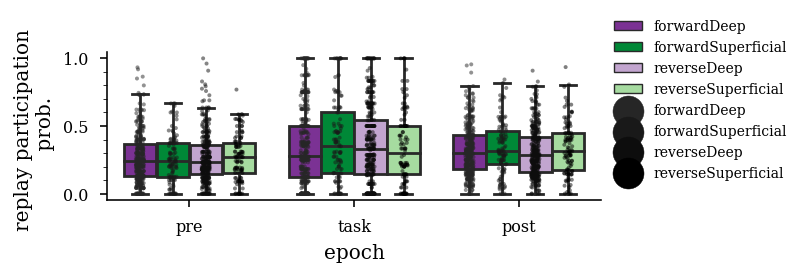

In [130]:
plt.figure(figsize=functions.set_size('thesis', fraction=.75, subplots=(1, 2)), edgecolor=None)

group_colors = {"forwardDeep": '#7b3294',
            'forwardSuperficial': '#008837',
            "reverseDeep": '#c2a5cf',
            'reverseSuperficial': '#a6dba0'} 
sns.set_palette(sns.color_palette(group_colors.values()))

ax = plt.gca()
sns.boxplot(x="epoch",
            y="participation",
            hue='replay_layer',
            hue_order=group_colors.keys(),
            saturation=1,
            showfliers=False,
            data=par_df,
            ax=ax)

sns.stripplot(x="epoch", y="participation",hue='replay_layer',hue_order=group_colors.keys(),dodge=True, data=par_df,
                size=2, color="k", linewidth=0,alpha=.5,ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())   
ax.legend(loc='best', bbox_to_anchor=(.9, 0., 0.5, 1.3),fontsize='x-small',frameon=False,markerscale=2)

ax.set_ylabel('replay participation \n prob.')

plt.savefig(os.path.join(fig_save_path,'replay_participation_deep_sup.svg'),dpi=300,bbox_inches='tight')


In [164]:
def get_ratio(x,y):
    return (y - x) / (y + x)

ratio_pre_task_forward = []
ratio_pre_post_forward = []
ratio_pre_task_reverse = []
ratio_pre_post_reverse = []
deepSuperficial = []
baseline_for = []
baseline_rev = []
for basepath in par_df.basepath.unique():
    for uid in par_df[(par_df.basepath == basepath)].UID.unique():
        baseline_forward = par_df[(par_df.basepath == basepath) &
                                    (par_df.UID == uid) &
                                    (par_df.epoch == 'pre') &
                                    (par_df.replay_type == 'forward')].participation.values
        task_forward = par_df[(par_df.basepath == basepath) &
                            (par_df.UID == uid) &
                            (par_df.epoch == 'task') &
                            (par_df.replay_type == 'forward')].participation.values
        post_forward = par_df[(par_df.basepath == basepath) &
                            (par_df.UID == uid) &
                            (par_df.epoch == 'post') &
                            (par_df.replay_type == 'forward')].participation.values

        baseline_for.append(baseline_forward)
        ratio_pre_task_forward.append(get_ratio(baseline_forward,task_forward))
        ratio_pre_post_forward.append(get_ratio(baseline_forward,post_forward))

        baseline_reverse = par_df[(par_df.basepath == basepath) &
                                    (par_df.UID == uid) &
                                    (par_df.epoch == 'pre') &
                                    (par_df.replay_type == 'reverse')].participation.values
        task_reverse = par_df[(par_df.basepath == basepath) &
                            (par_df.UID == uid) &
                            (par_df.epoch == 'task') &
                            (par_df.replay_type == 'reverse')].participation.values
        post_reverse = par_df[(par_df.basepath == basepath) &
                            (par_df.UID == uid) &
                            (par_df.epoch == 'post') &
                            (par_df.replay_type == 'reverse')].participation.values

        baseline_rev.append(baseline_reverse)
        ratio_pre_task_reverse.append(get_ratio(baseline_reverse,task_reverse))
        ratio_pre_post_reverse.append(get_ratio(baseline_reverse,post_reverse))

        deepSuperficial.append(par_df[(par_df.basepath == basepath) &
                    (par_df.UID == uid) &
                    (par_df.epoch == 'pre') &
                    (par_df.replay_type == 'reverse')].deepSuperficial)

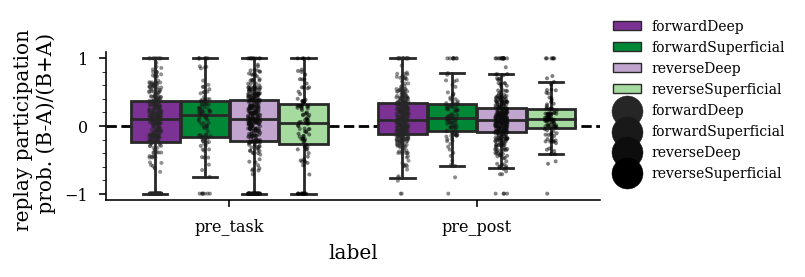

In [167]:
ratio_df = pd.DataFrame()
ratio_df['participation'] = np.hstack([np.hstack(ratio_pre_task_forward),np.hstack(ratio_pre_post_forward),np.hstack(ratio_pre_task_reverse),np.hstack(ratio_pre_post_reverse)])
ratio_df['baseline'] = np.hstack([np.hstack(baseline_for),np.hstack(baseline_for),np.hstack(baseline_rev),np.hstack(baseline_rev)])

ratio_df['label'] = np.hstack([['pre_task']*len(ratio_pre_task_forward),
                                ['pre_post']*len(ratio_pre_post_forward),
                                ['pre_task']*len(ratio_pre_task_reverse),
                                ['pre_post']*len(ratio_pre_post_reverse)])

ratio_df['replay_type'] = np.hstack([['forward']*len(ratio_pre_task_forward),
                                ['forward']*len(ratio_pre_post_forward),
                                ['reverse']*len(ratio_pre_task_reverse),
                                ['reverse']*len(ratio_pre_post_reverse)])
ratio_df['deepSuperficial'] = np.hstack([np.hstack(deepSuperficial),np.hstack(deepSuperficial),np.hstack(deepSuperficial),np.hstack(deepSuperficial)])

ratio_df['replay_layer'] = ratio_df['replay_type'] + ratio_df['deepSuperficial'] 

plt.figure(figsize=functions.set_size('thesis', fraction=.75, subplots=(1, 2)), edgecolor=None)

group_colors = {"forwardDeep": '#7b3294',
            'forwardSuperficial': '#008837',
            "reverseDeep": '#c2a5cf',
            'reverseSuperficial': '#a6dba0'} 
sns.set_palette(sns.color_palette(group_colors.values()))

ax = plt.gca()
sns.boxplot(x="label",
            y="participation",
            hue='replay_layer',
            hue_order=group_colors.keys(),
            saturation=1,
            showfliers=False,
            data=ratio_df,
            ax=ax)

sns.stripplot(x="label", y="participation",hue='replay_layer',hue_order=group_colors.keys(),dodge=True, data=ratio_df,
                size=2, color="k", linewidth=0,alpha=.5,ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())   
ax.legend(loc='best', bbox_to_anchor=(.9, 0., 0.5, 1.3),fontsize='x-small',frameon=False,markerscale=2)

ax.set_ylabel('replay participation \n prob. (B-A)/(B+A)')
ax.axhline(0,color='k',zorder=-1000,linestyle="--")

<AxesSubplot:xlabel='baseline', ylabel='participation'>

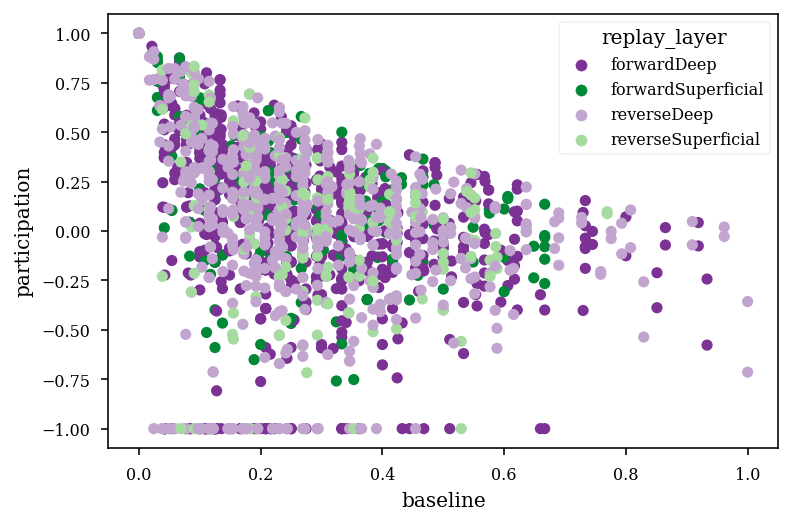

In [166]:
sns.scatterplot(x="baseline", y="participation",
                hue="replay_layer",
                hue_order=group_colors.keys(),
                linewidth=0,
                data=ratio_df)

In [157]:
def get_ratio(x,y):
    return (y - x) / (y + x)

In [153]:
ratio_df = pd.DataFrame()

ratio_pre_task_forward = get_ratio(par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].participation.values,
                            par_df[(par_df.epoch == 'task') & (par_df.replay_type == 'forward')].participation.values)

ratio_pre_post_forward = get_ratio(par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].participation.values,
                            par_df[(par_df.epoch == 'post') & (par_df.replay_type == 'forward')].participation.values)

ratio_pre_task_reverse = get_ratio(par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].participation.values,
                            par_df[(par_df.epoch == 'task') & (par_df.replay_type == 'reverse')].participation.values)

ratio_pre_post_reverse = get_ratio(par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].participation.values,
                            par_df[(par_df.epoch == 'post') & (par_df.replay_type == 'reverse')].participation.values)

ratio_df['ratio'] = np.hstack([ratio_pre_task_forward,ratio_pre_post_forward,ratio_pre_task_reverse,ratio_pre_post_reverse])

ratio_df['label'] = np.hstack([['pre_task']*len(ratio_pre_task_forward),
                                ['pre_post']*len(ratio_pre_post_forward),
                                ['pre_task']*len(ratio_pre_task_reverse),
                                ['pre_post']*len(ratio_pre_post_reverse)])

ratio_df['UID'] = np.hstack([par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].UID,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].UID,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].UID,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].UID])

ratio_df['replay_layer'] = np.hstack([par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].replay_layer,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].replay_layer,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].replay_layer,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].replay_layer])

ratio_df['deepSuperficial'] = np.hstack([par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].deepSuperficial,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'forward')].deepSuperficial,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].deepSuperficial,
                            par_df[(par_df.epoch == 'pre') & (par_df.replay_type == 'reverse')].deepSuperficial])

ratio_df['replay_type'] = np.hstack([['forward']*(len(ratio_pre_task_forward)+len(ratio_pre_post_forward)),
                                    ['reverse']*(len(ratio_pre_task_forward)+len(ratio_pre_post_forward))])
ratio_df.head()

ratio     label  UID        replay_layer deepSuperficial replay_type
0 -0.751825  pre_task    3  forwardSuperficial     Superficial     forward
1  0.351988  pre_task    7         forwardDeep            Deep     forward
2  0.237435  pre_task   11         forwardDeep            Deep     forward
3  0.406151  pre_task   12         forwardDeep            Deep     forward
4  0.276773  pre_task   16  forwardSuperficial     Superficial     forward

Text(0, 0.5, 'replay participation \n prob.')

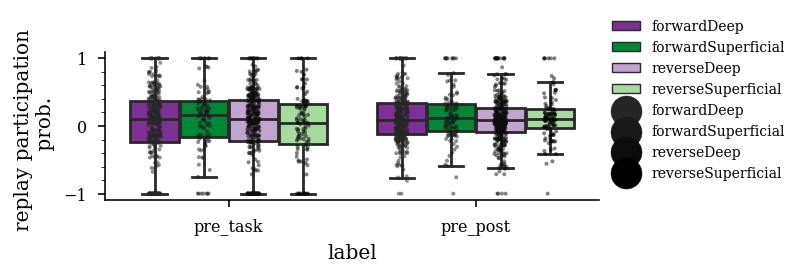

In [154]:
plt.figure(figsize=functions.set_size('thesis', fraction=.75, subplots=(1, 2)), edgecolor=None)

group_colors = {"forwardDeep": '#7b3294',
            'forwardSuperficial': '#008837',
            "reverseDeep": '#c2a5cf',
            'reverseSuperficial': '#a6dba0'} 
sns.set_palette(sns.color_palette(group_colors.values()))

ax = plt.gca()
sns.boxplot(x="label",
            y="ratio",
            hue='replay_layer',
            hue_order=group_colors.keys(),
            saturation=1,
            showfliers=False,
            data=ratio_df,
            ax=ax)

sns.stripplot(x="label", y="ratio",hue='replay_layer',hue_order=group_colors.keys(),dodge=True, data=ratio_df,
              size=2, color="k", linewidth=0,alpha=.5,ax=ax)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator())   
ax.legend(loc='best', bbox_to_anchor=(.9, 0., 0.5, 1.3),fontsize='x-small',frameon=False,markerscale=2)

ax.set_ylabel('replay participation \n prob.')


(-1.1, 1.1, -1.1, 1.1)

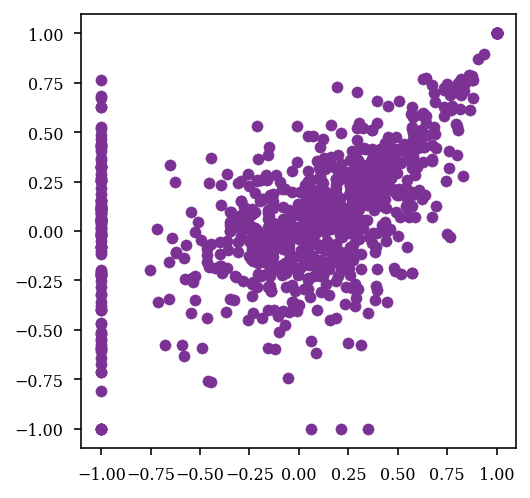

In [155]:
plt.scatter(ratio_df[ratio_df.label == 'pre_task'].ratio,ratio_df[ratio_df.label == 'pre_post'].ratio)
plt.axis('square')

Text(111.65, 0.5, 'reverse replay')

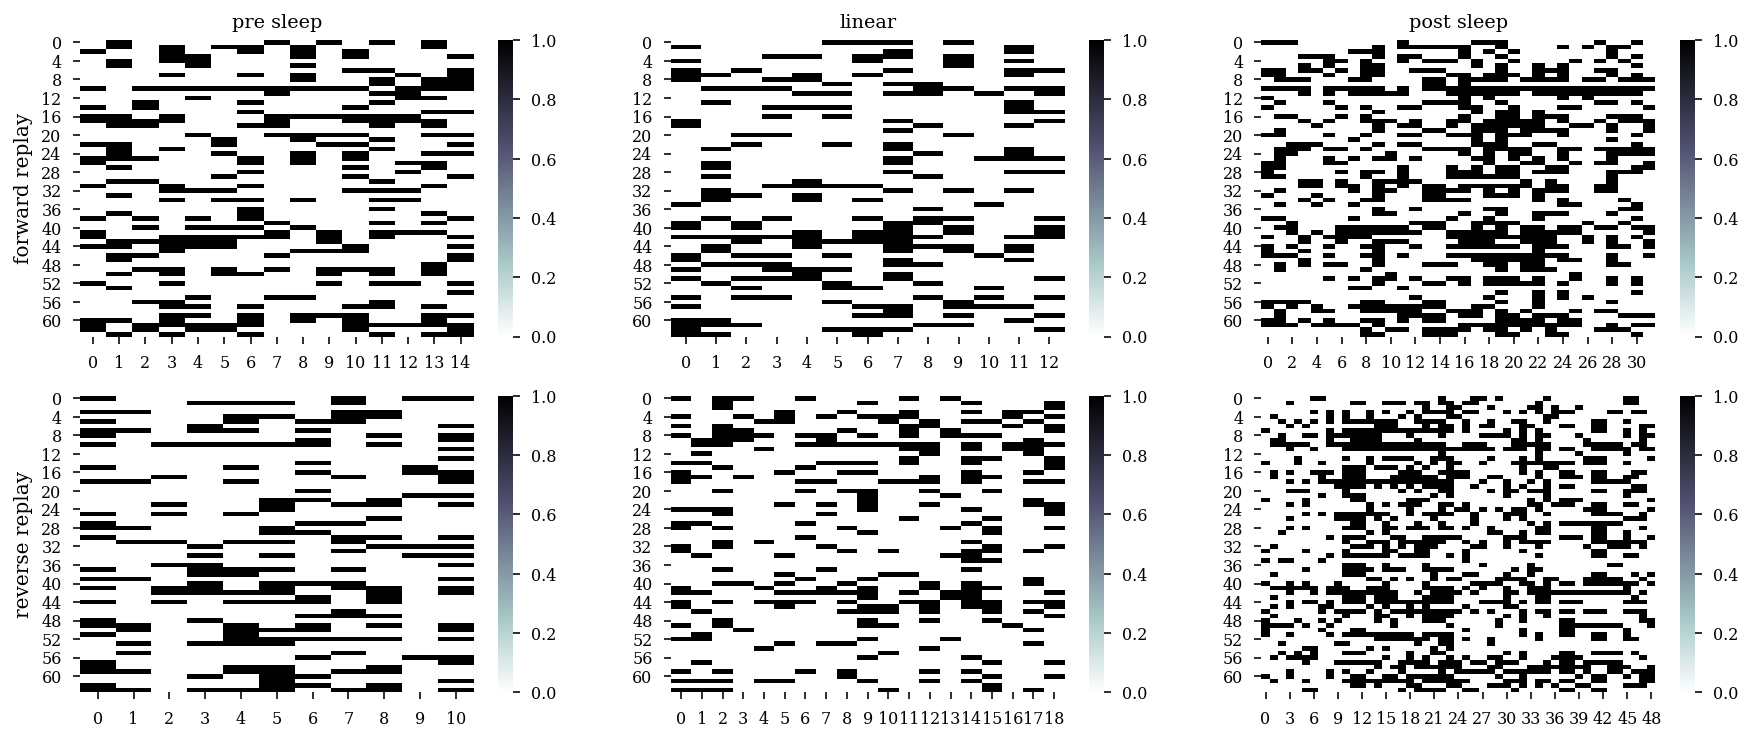

In [267]:
fig,ax = plt.subplots(2,3,figsize=(15,6))

unit_mat = functions.get_participation(st.data,
                            behavior_epochs[0][nrem_epochs][forward_replay].starts,
                            behavior_epochs[0][nrem_epochs][forward_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[0,0],cmap='bone_r')

unit_mat = functions.get_participation(st.data,
                            behavior_epochs[1][wake_epochs][forward_replay].starts,
                            behavior_epochs[1][wake_epochs][forward_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[0,1],cmap='bone_r')

unit_mat = functions.get_participation(st.data,
                            behavior_epochs[2][nrem_epochs][forward_replay].starts,
                            behavior_epochs[2][nrem_epochs][forward_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[0,2],cmap='bone_r')


unit_mat = functions.get_participation(st.data,
                            behavior_epochs[0][nrem_epochs][reverse_replay].starts,
                            behavior_epochs[0][nrem_epochs][reverse_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[1,0],cmap='bone_r')

unit_mat = functions.get_participation(st.data,
                            behavior_epochs[1][wake_epochs][reverse_replay].starts,
                            behavior_epochs[1][wake_epochs][reverse_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[1,1],cmap='bone_r')

unit_mat = functions.get_participation(st.data,
                            behavior_epochs[2][nrem_epochs][reverse_replay].starts,
                            behavior_epochs[2][nrem_epochs][reverse_replay].stops,
                            par_type='binary')
sns.heatmap(unit_mat,ax=ax[1,2],cmap='bone_r')

ax[0,0].set_title('pre sleep')
ax[0,1].set_title('linear')
ax[0,2].set_title('post sleep')

ax[0,0].set_ylabel('forward replay')
ax[1,0].set_ylabel('reverse replay')


In [229]:
results['outbound_epochs']['cell_metrics'].deepSuperficial

2      Superficial
6             Deep
10            Deep
11            Deep
15     Superficial
          ...     
256           Deep
257    Superficial
258           Deep
267           Deep
269           Deep
Name: deepSuperficial, Length: 64, dtype: object

In [216]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])

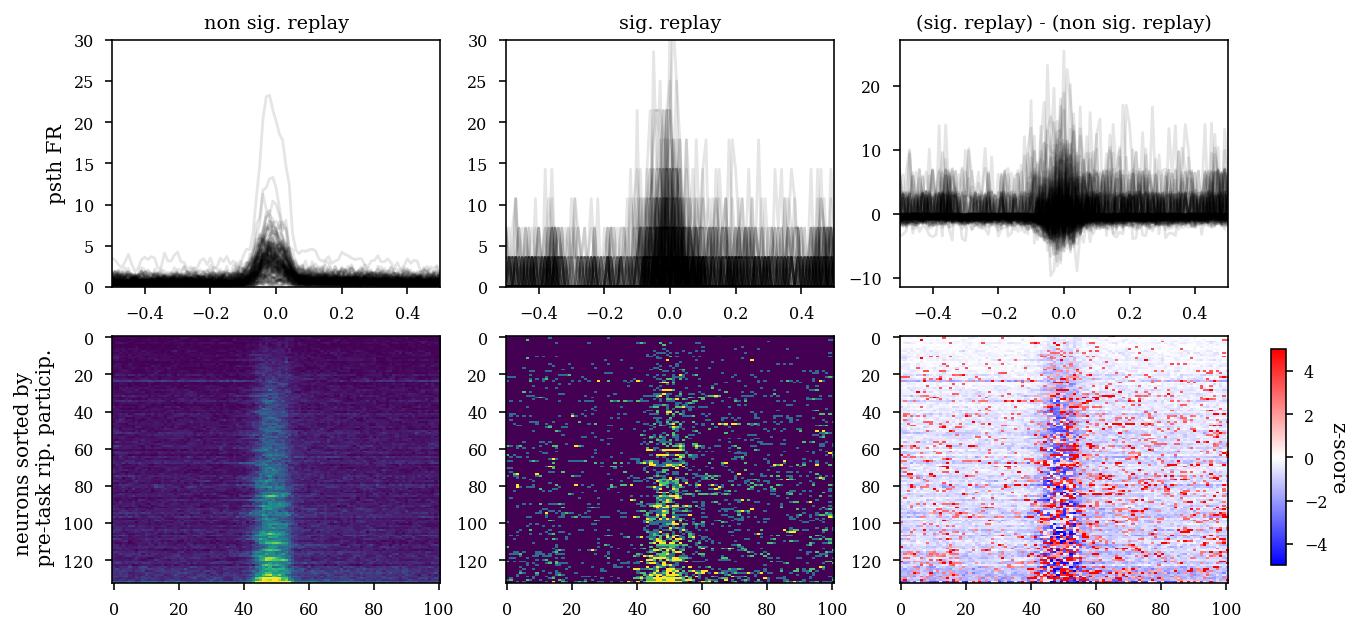

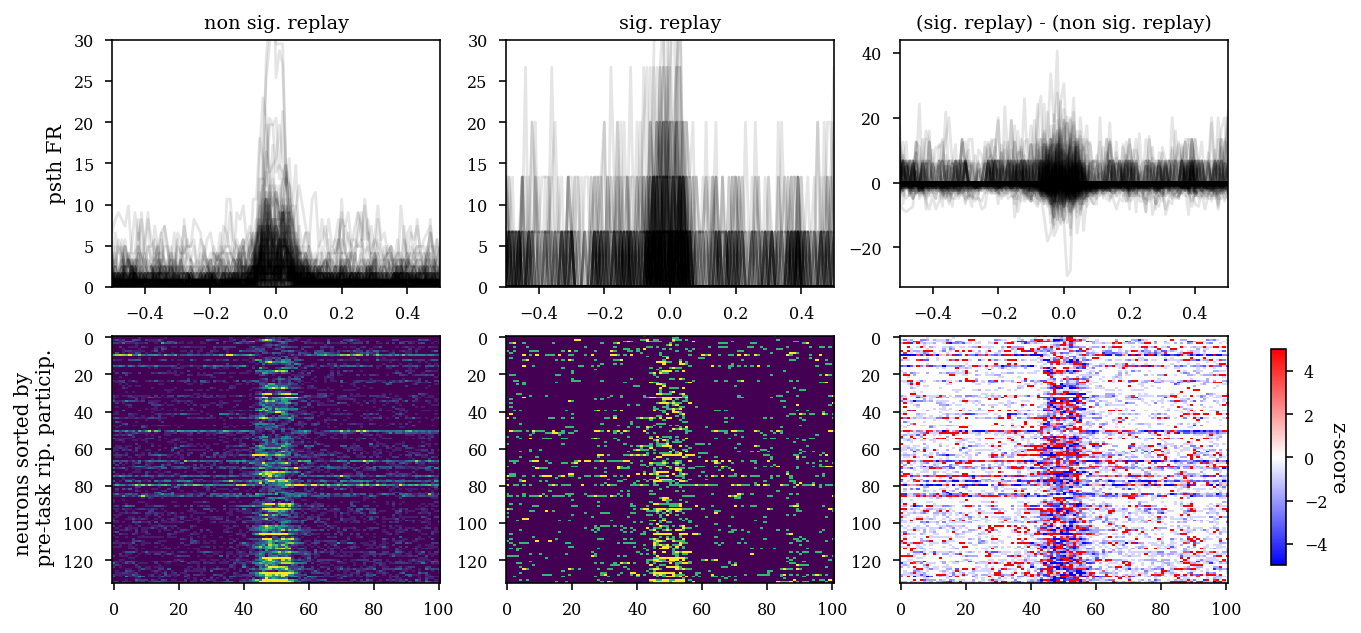

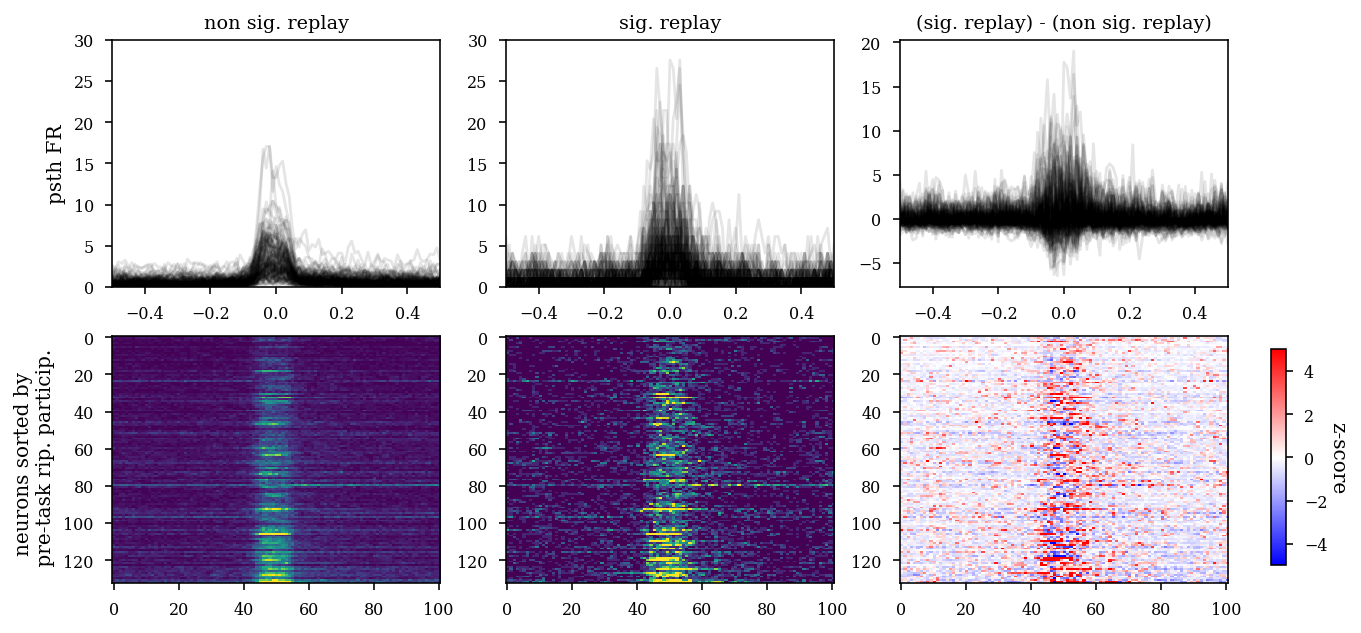

In [277]:
def plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=2):
    fig,axs = plt.subplots(2,3,figsize=(10,5))

    psth_non_sig = functions.compute_psth(st[behavioral_epochs[epoch]].data,non_sig_replay_epochs[behavioral_epochs[epoch]].centers,bin_width=0.01,n_bins=100)
    axs[0,0].plot(psth_non_sig,color='k',alpha=.1)
    axs[1,0].imshow(psth_non_sig[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',vmax=10)

    psth_sig = functions.compute_psth(st[behavioral_epochs[epoch]].data,sig_replay_epochs[behavioral_epochs[epoch]].centers,bin_width=0.01,n_bins=100)
    axs[0,1].plot(psth_sig,color='k',alpha=.1)
    axs[1,1].imshow(psth_sig[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',vmax=10)

    axs[0,2].plot(psth_sig-psth_non_sig,color='k',alpha=.1)
    sm = axs[1,2].imshow((psth_sig-psth_non_sig)[np.argsort(unit_partic)].T,aspect='auto',interpolation='nearest',cmap='bwr',vmax=5,vmin=-5)

    axs[0,0].set_ylim(0,30)
    axs[0,1].set_ylim(0,30)

    axs[0,0].set_title('non sig. replay')
    axs[0,1].set_title('sig. replay')
    axs[0,2].set_title('(sig. replay) - (non sig. replay)')

    axs[0,0].set_ylabel('psth FR')

    axs[1,0].set_ylabel('neurons sorted by \n pre-task rip. particip.')

    axs[0,0].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())
    axs[0,1].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())
    axs[0,2].set_xlim(psth_non_sig.index.min(),psth_non_sig.index.max())


    cax = plt.axes([.93, 0.15, 0.01, 0.3])
    cbar = plt.colorbar(sm,cax=cax)
    cbar.set_label('z-score', rotation=270, labelpad=10)

plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=0)    

plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=1)    
plot_custom_psth(st,behavioral_epochs,unit_partic,epoch=2)    


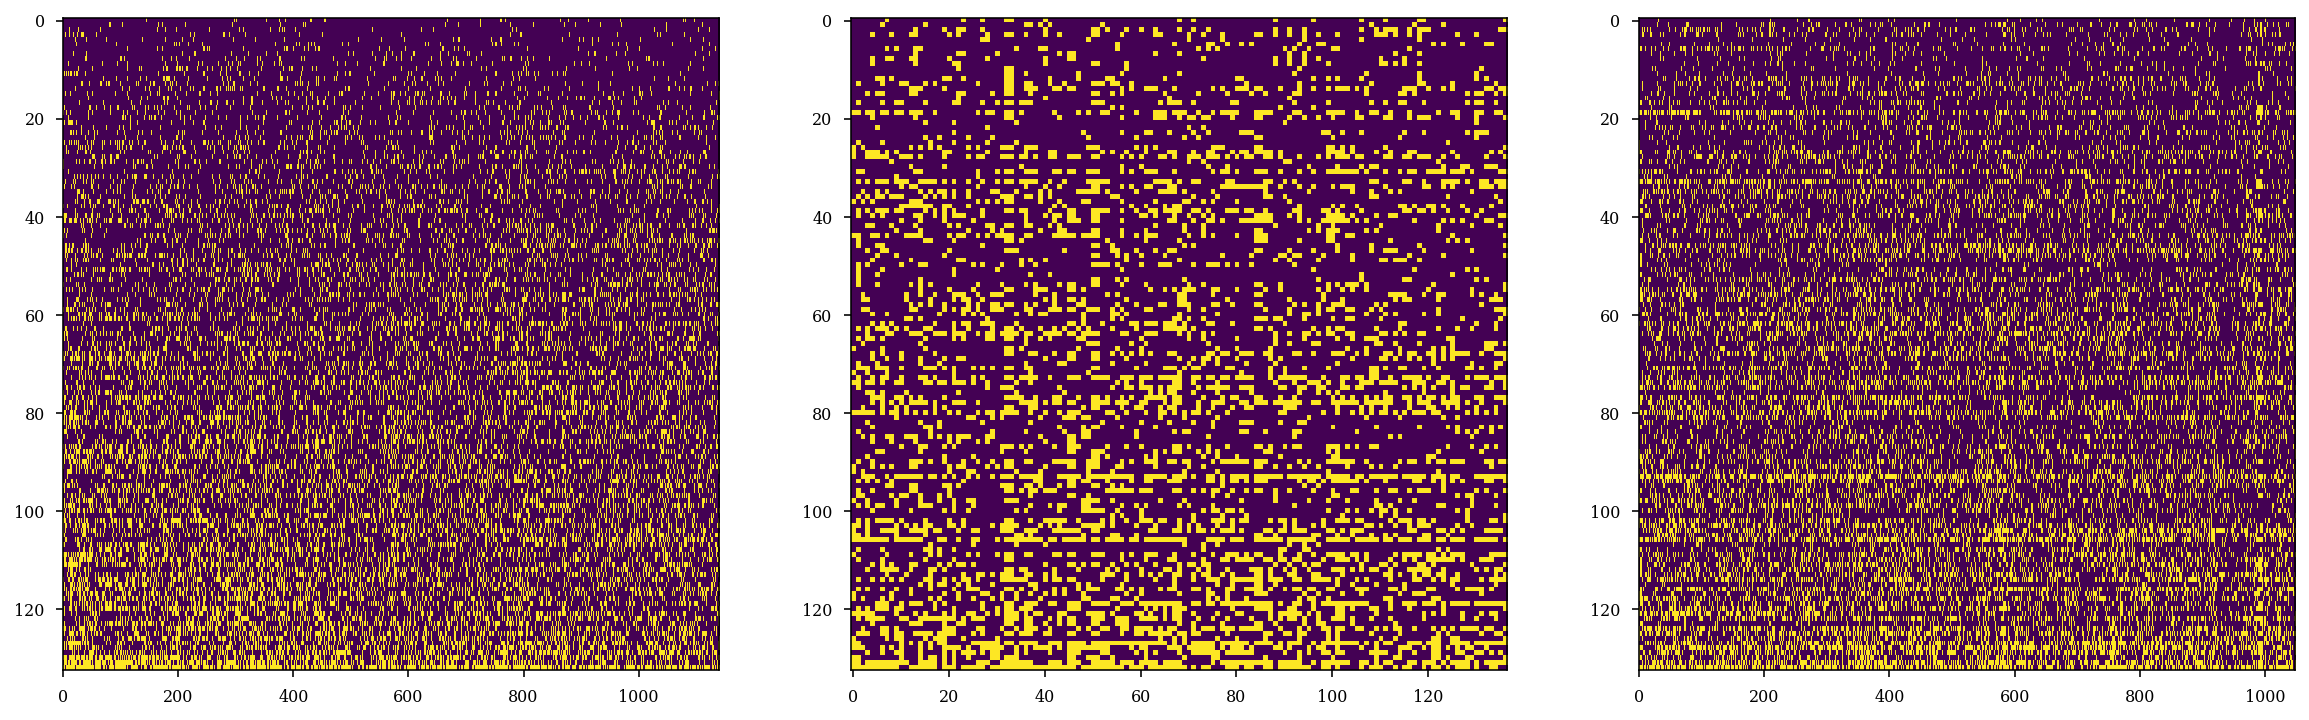

In [284]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

fig,axs = plt.subplots(1,3,figsize=(20,6))
idx = np.argsort(unit_partic)
axs[0].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[1]].starts
stops = ripple_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

# idx = np.argsort(unit_partic)
axs[1].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')


starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
pop_partic = particip_mat.mean(axis=0)
unit_partic = particip_mat.mean(axis=1)

# idx = np.argsort(unit_partic)
axs[2].imshow(particip_mat[idx,:],aspect='auto',interpolation='nearest')

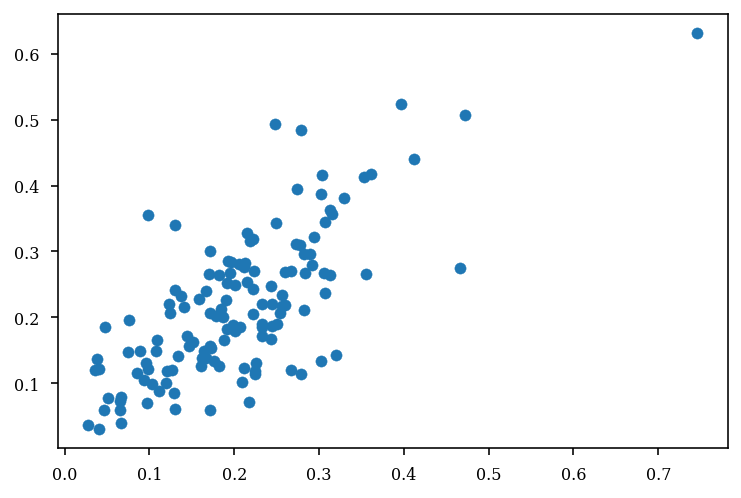

In [285]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_pre = particip_mat_pre.mean(axis=1)

starts = ripple_epochs[behavioral_epochs[2]].starts
stops = ripple_epochs[behavioral_epochs[2]].stops
particip_mat_post = functions.get_participation(st.data,starts,stops)
# pop_partic = particip_mat.mean(axis=0)
unit_partic_post = particip_mat_post.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_post)

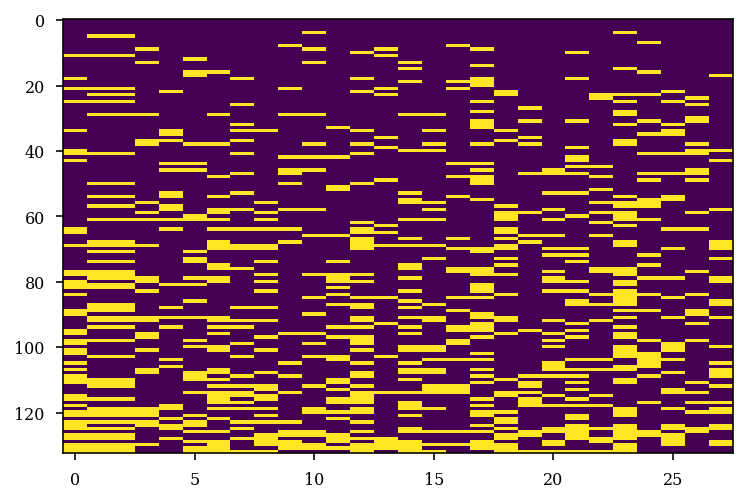

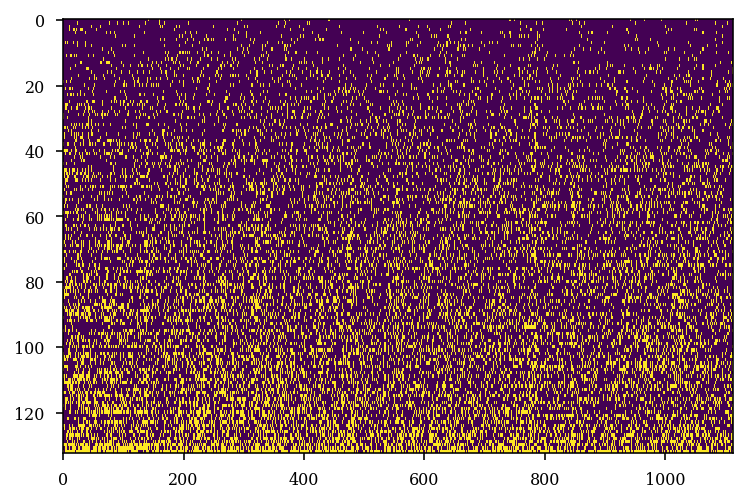

In [131]:
# plt.hist(unit_partic_pre,50)
# plt.show()

idx = results['df'].peaks.between(behavioral_epochs[0].start,behavioral_epochs[0].stop)

sort_idx = np.argsort(unit_partic_pre)

plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle < 0.01][sort_idx],aspect='auto',interpolation='nearest')
plt.figure()
plt.imshow(particip_mat_pre[:,results['df'][idx].score_pval_col_cycle > 0.01][sort_idx],aspect='auto',interpolation='nearest')


In [132]:
sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])

starts = sig_replay_epochs[behavioral_epochs[0]].starts
stops = sig_replay_epochs[behavioral_epochs[0]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_pre_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[1]].starts
stops = sig_replay_epochs[behavioral_epochs[1]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_task_sig_replay = particip_mat.mean(axis=1)

starts = sig_replay_epochs[behavioral_epochs[2]].starts
stops = sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat = functions.get_participation(st.data,starts,stops)
unit_partic_post_sig_replay = particip_mat.mean(axis=1)

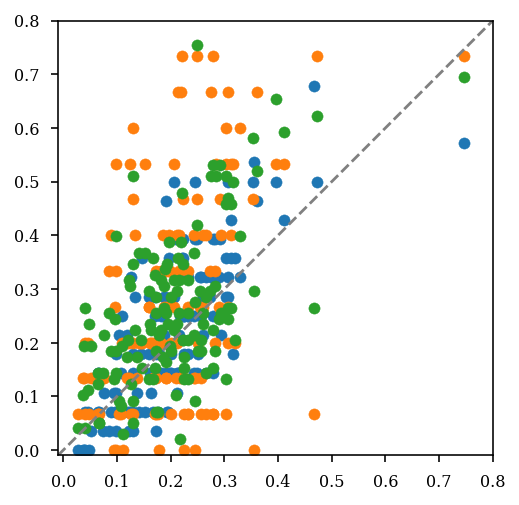

In [156]:
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
unit_partic_pre = particip_mat_pre.mean(axis=1)

plt.scatter(unit_partic_pre,unit_partic_pre_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_task_sig_replay)
plt.scatter(unit_partic_pre,unit_partic_post_sig_replay)
plt.xlim(-.01,.8)
plt.ylim(-.01,.8)
ax = plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes,color='grey', ls='--')
ax.set_aspect('equal', adjustable='box')


In [167]:
# starts = sig_replay_epochs[behavioral_epochs[0]].starts
# stops = sig_replay_epochs[behavioral_epochs[0]].stops
# particip_mat = functions.get_participation(st.data,starts,stops)
# unit_partic_pre_sig_replay = particip_mat.mean(axis=1)

# # plt.imshow(unit_partic_pre[particip_mat])
# plt.imshow(unit_partic_pre[particip_mat],aspect='auto',interpolation='nearest')
# plt.colorbar()


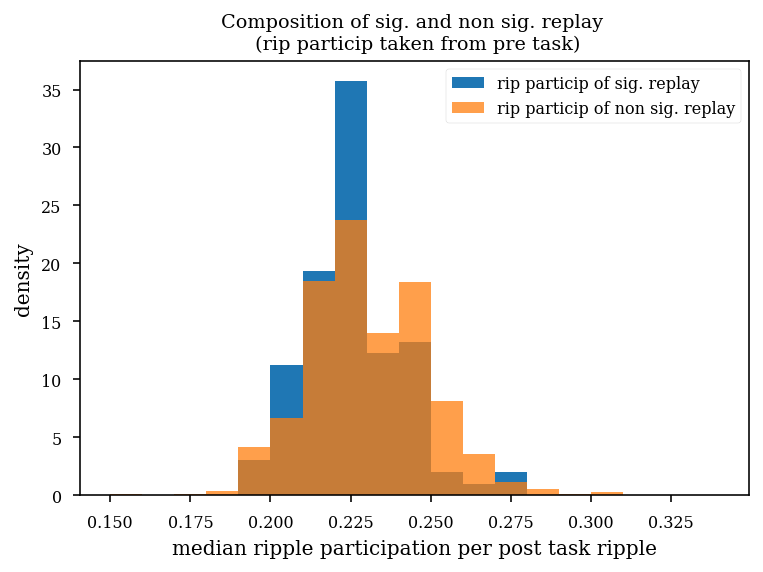

In [191]:
sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle < 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle < 0.01]]).T])

non_sig_replay_epochs = nel.EpochArray([np.array([results['df'].start[results['df'].score_pval_col_cycle > 0.01],
                                                results['df'].stop[results['df'].score_pval_col_cycle > 0.01]]).T])
# get pre participation
starts = ripple_epochs[behavioral_epochs[0]].starts
stops = ripple_epochs[behavioral_epochs[0]].stops
particip_mat_pre = functions.get_participation(st.data,starts,stops)
unit_partic_pre = particip_mat_pre.mean(axis=1)

# get participation in sig. replay
starts = sig_replay_epochs[behavioral_epochs[2]].starts
stops = sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat_sig_replay = functions.get_participation(st.data,starts,stops)

# get participation in non-sig. replay
starts = non_sig_replay_epochs[behavioral_epochs[2]].starts
stops = non_sig_replay_epochs[behavioral_epochs[2]].stops
particip_mat_non_sig_replay = functions.get_participation(st.data,starts,stops)

par_out = []
for event in particip_mat_sig_replay.T:
    par_out.append(np.median(unit_partic_pre[event == 1]))
par_out_sig_replay = np.hstack(par_out)

par_out = []
for event in particip_mat_non_sig_replay.T:
    par_out.append(np.median(unit_partic_pre[event == 1]))
par_out_non_sig_replay = np.hstack(par_out)

bins = np.arange(.15,.35,.01)
plt.hist(par_out_sig_replay,bins=bins,density=True,label='rip particip of sig. replay')
plt.hist(par_out_non_sig_replay,bins=bins,alpha=.75,density=True,label='rip particip of non sig. replay')
plt.xlabel('median ripple participation per post task ripple')
plt.ylabel('density')
plt.title('Composition of sig. and non sig. replay \n (rip particip taken from pre task)')
plt.legend()
plt.show()

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


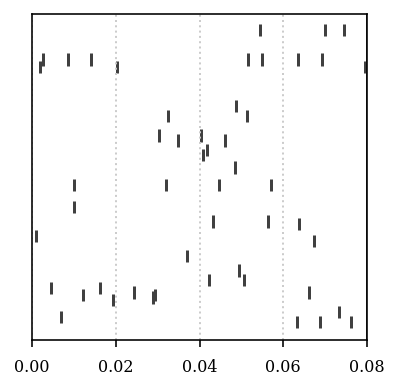

In [20]:

plt.figure(figsize=(3,3))

# plt.eventplot(results['sta_placecells'].data)
# plt.show()
bst = results['bst_placecells']
st = results['sta_placecells']
tc_placecells = results['tc']

idx = 0
bst = bst[idx]

no = tc_placecells.get_peak_firing_order_ids()
st.reorder_units_by_ids(no, inplace=True)

st_cut = st[bst.support]
st_cut._support = bst.support # hacky fix so that we can plot events out of order
st_cut = nel.utils.collapse_time(st_cut)

ax=plt.gca()
npl.rasterplot(st_cut, vertstack=True, ax=ax, lh=5)
ax.set_xlim(st_cut.support.time.squeeze())

bin_edges = np.linspace(st_cut.support.time[0,0],
                        st_cut.support.time[0,1],
                        bst.n_bins+1)

ax.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
ax.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')

npl.utils.no_yticks(ax)
npl.utils.no_yticklabels(ax)

## Explore broad features of sig and non sig replay from different thresholds

<AxesSubplot:xlabel='pop_partic', ylabel='Probability'>

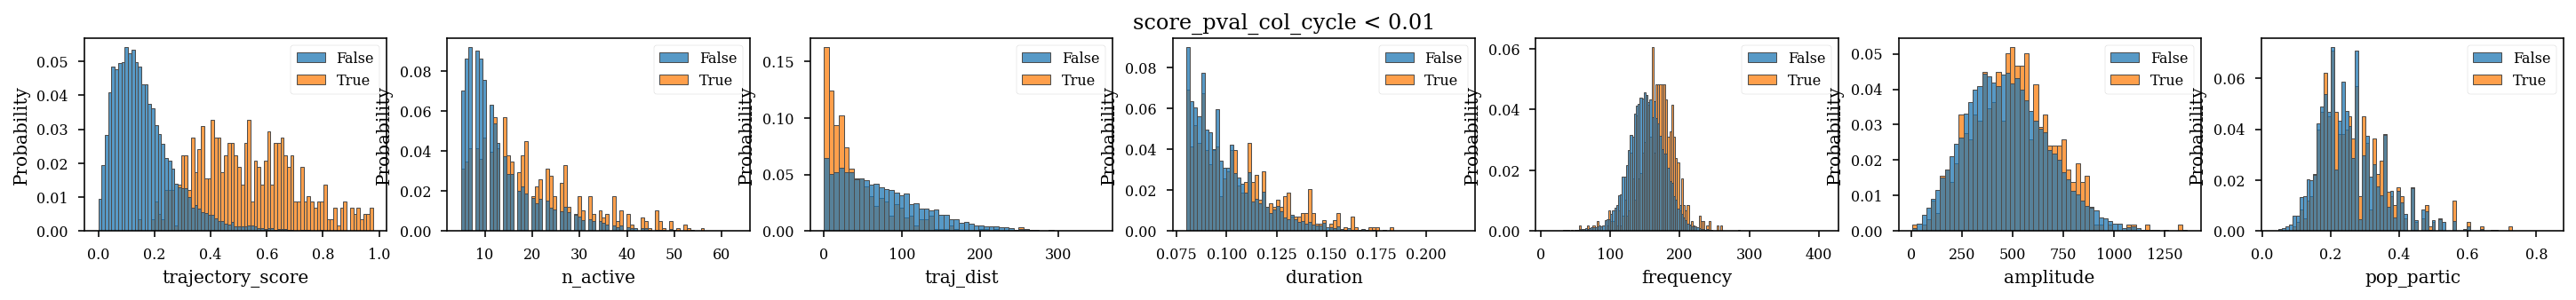

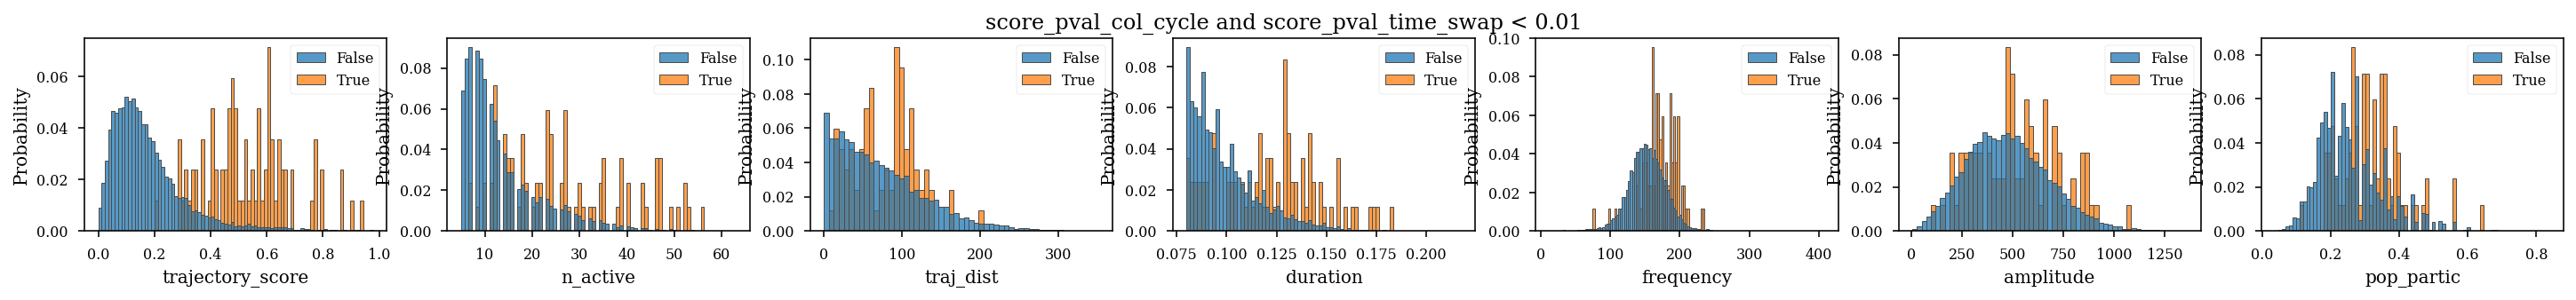

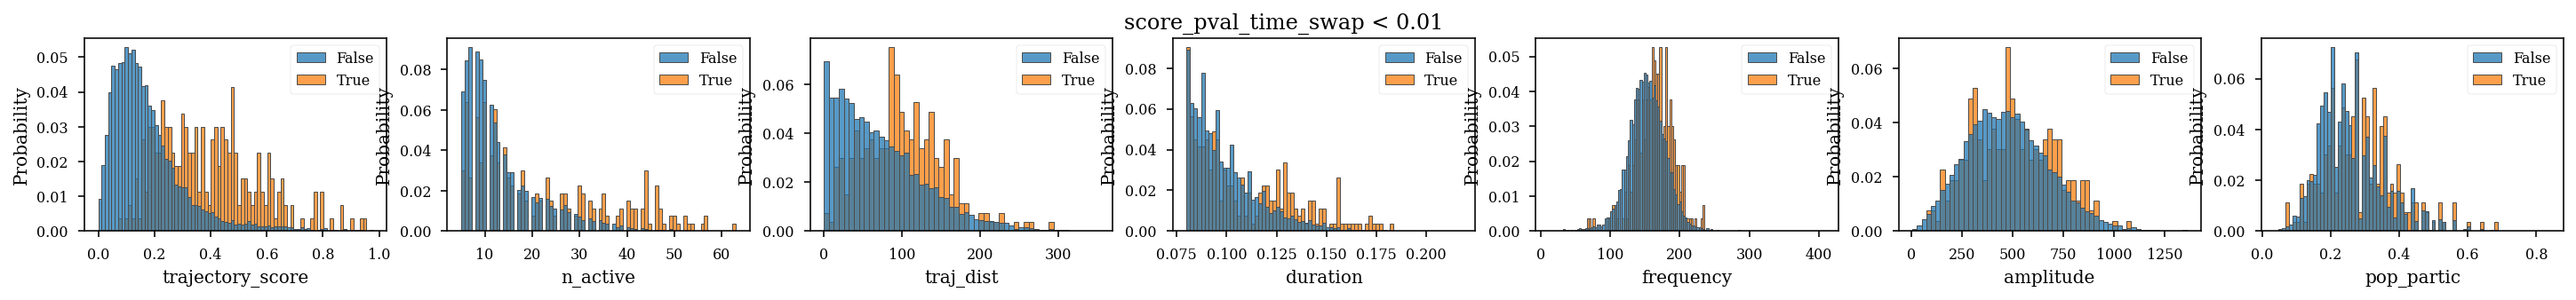

In [198]:
fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle < 0.01', fontsize=12)
idx = df['score_pval_col_cycle'].values < 0.01
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_col_cycle and score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_col_cycle'] < 0.01) & (df['score_pval_time_swap'] < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

fig, axs = plt.subplots(1,7,figsize=(25,2))
fig.suptitle('score_pval_time_swap < 0.01', fontsize=12)
idx = (df['score_pval_time_swap'].values < 0.01)
sns.histplot(df,x="trajectory_score", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[0])
sns.histplot(df,x="n_active", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[1])
sns.histplot(df,x="traj_dist", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[2])
sns.histplot(df,x="duration", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[3])
sns.histplot(df,x="frequency", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[4])
sns.histplot(df,x="amplitude", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[5])
sns.histplot(df,x="pop_partic", hue=idx,edgecolor=".3",stat='probability',common_norm=False,linewidth=.5,ax=axs[6])

## Nice event plots

In [100]:
def gather_events(basepath):
    epoch_df = loading.load_epoch(basepath)
    pattern_idx,_ = functions.find_epoch_pattern(epoch_df.environment,['sleep','linear','sleep'])
    epoch_df = epoch_df[pattern_idx]
    presleep_epochs = nel.EpochArray([np.array([epoch_df.startTime.iloc[0],
                                                epoch_df.stopTime.iloc[0]]).T])
    linear_epochs = nel.EpochArray([np.array([epoch_df.startTime.iloc[1],
                                                epoch_df.stopTime.iloc[1]]).T])
    postsleep_epochs = nel.EpochArray([np.array([epoch_df.startTime.iloc[2],
                                                epoch_df.stopTime.iloc[2]]).T])

    state_dict = loading.load_SleepState_states(basepath)
    nrem_epochs = nel.EpochArray(state_dict['NREMstate'])
    wake_epochs = nel.EpochArray(state_dict['WAKEstate'])
    rem_epochs = nel.EpochArray(state_dict['REMstate'])


    temp_df = results['outbound_epochs']['df'][(results['outbound_epochs']['df']['score_pval_time_swap'] < 0.05) &
                                                (results['inbound_epochs']['df'].replay_type == 'reverse')]
    reverse_replay_epochs = nel.EpochArray([np.array([temp_df.start-.2,
                                                temp_df.stop+.2]).T])

    temp_df = results['inbound_epochs']['df'][(results['inbound_epochs']['df']['score_pval_time_swap'] < 0.05) & 
                                                (results['inbound_epochs']['df'].replay_type == 'forward')]
    forward_replay_epochs = nel.EpochArray([np.array([temp_df.start-.2,
                                                temp_df.stop+.2]).T])

    events = []
    events.append(nrem_epochs)
    events.append(wake_epochs)
    events.append(rem_epochs)
    events.append(presleep_epochs)
    events.append(linear_epochs)
    events.append(postsleep_epochs)
    events.append(reverse_replay_epochs)
    events.append(forward_replay_epochs)

    return events,['nrem','wake','rem','presleep','linear','postsleep','reverse_replay','forward_replay']

C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Cornell\AppData\Local\Temp/ipykernel_2424/1754881867.py:18: UserWarning: Boolean Series key will be reindexed to match Da

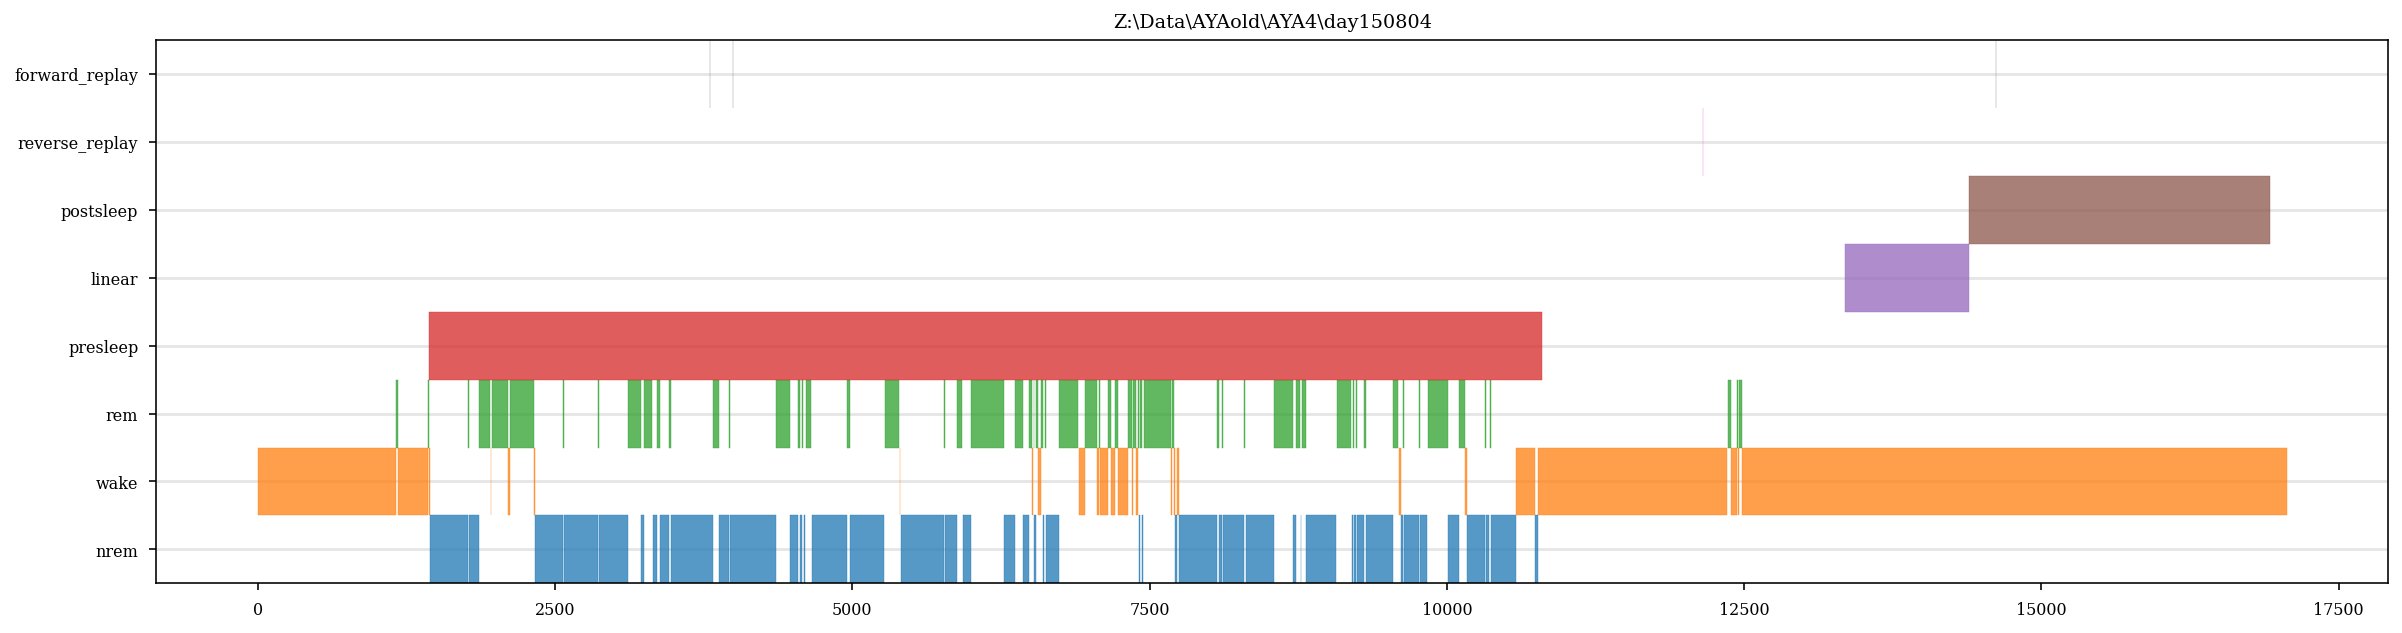

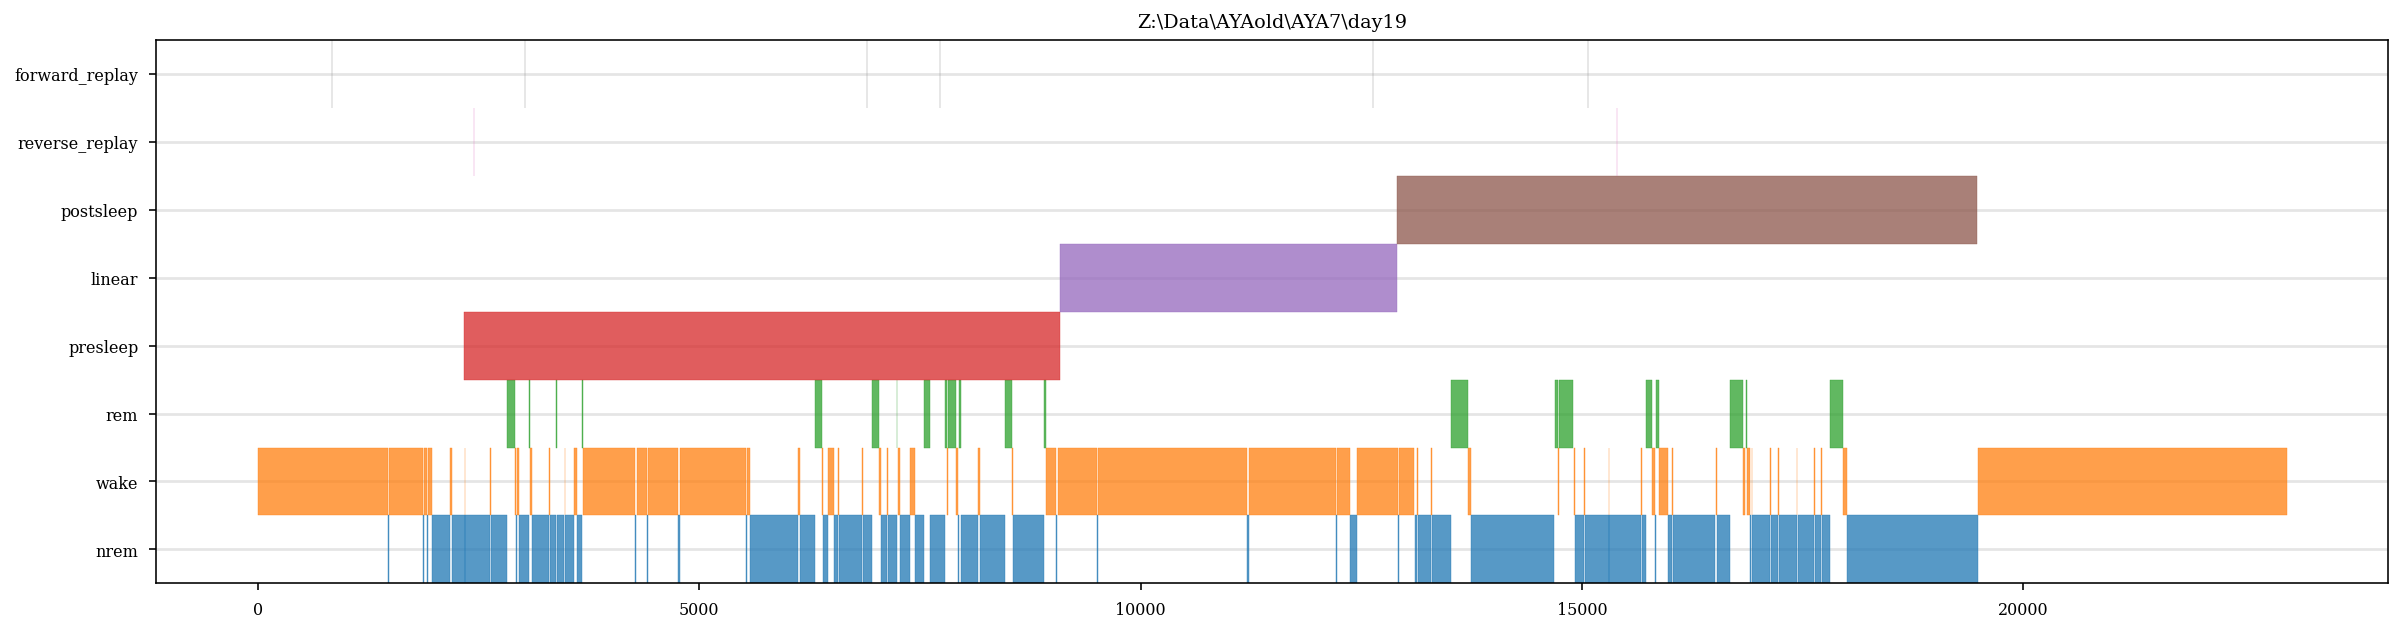

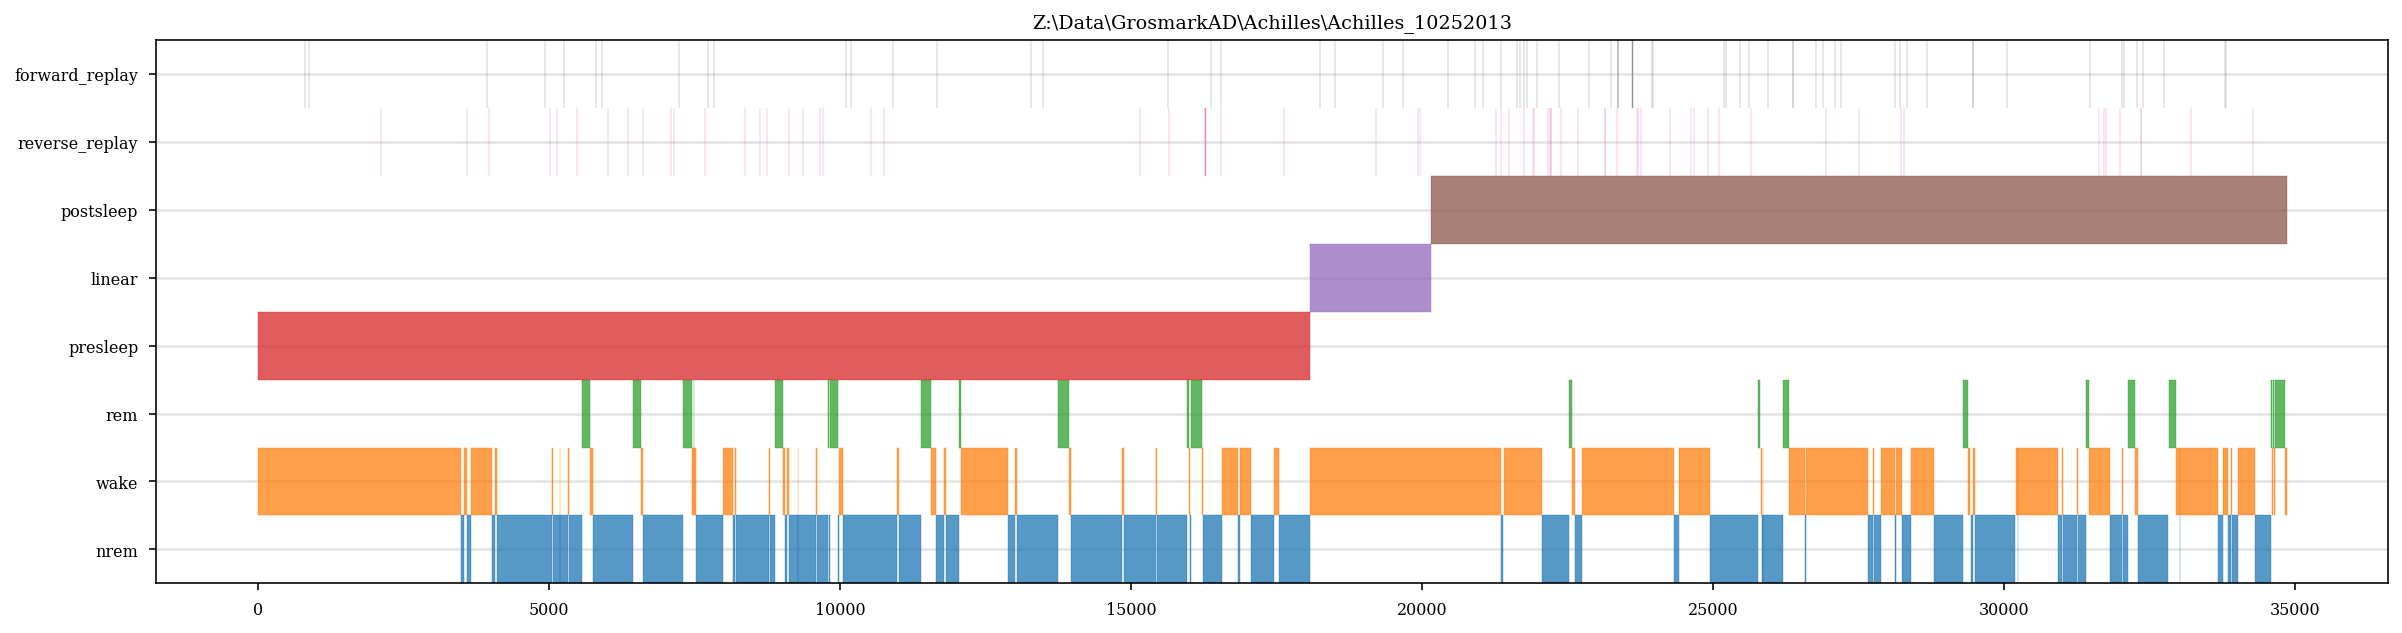

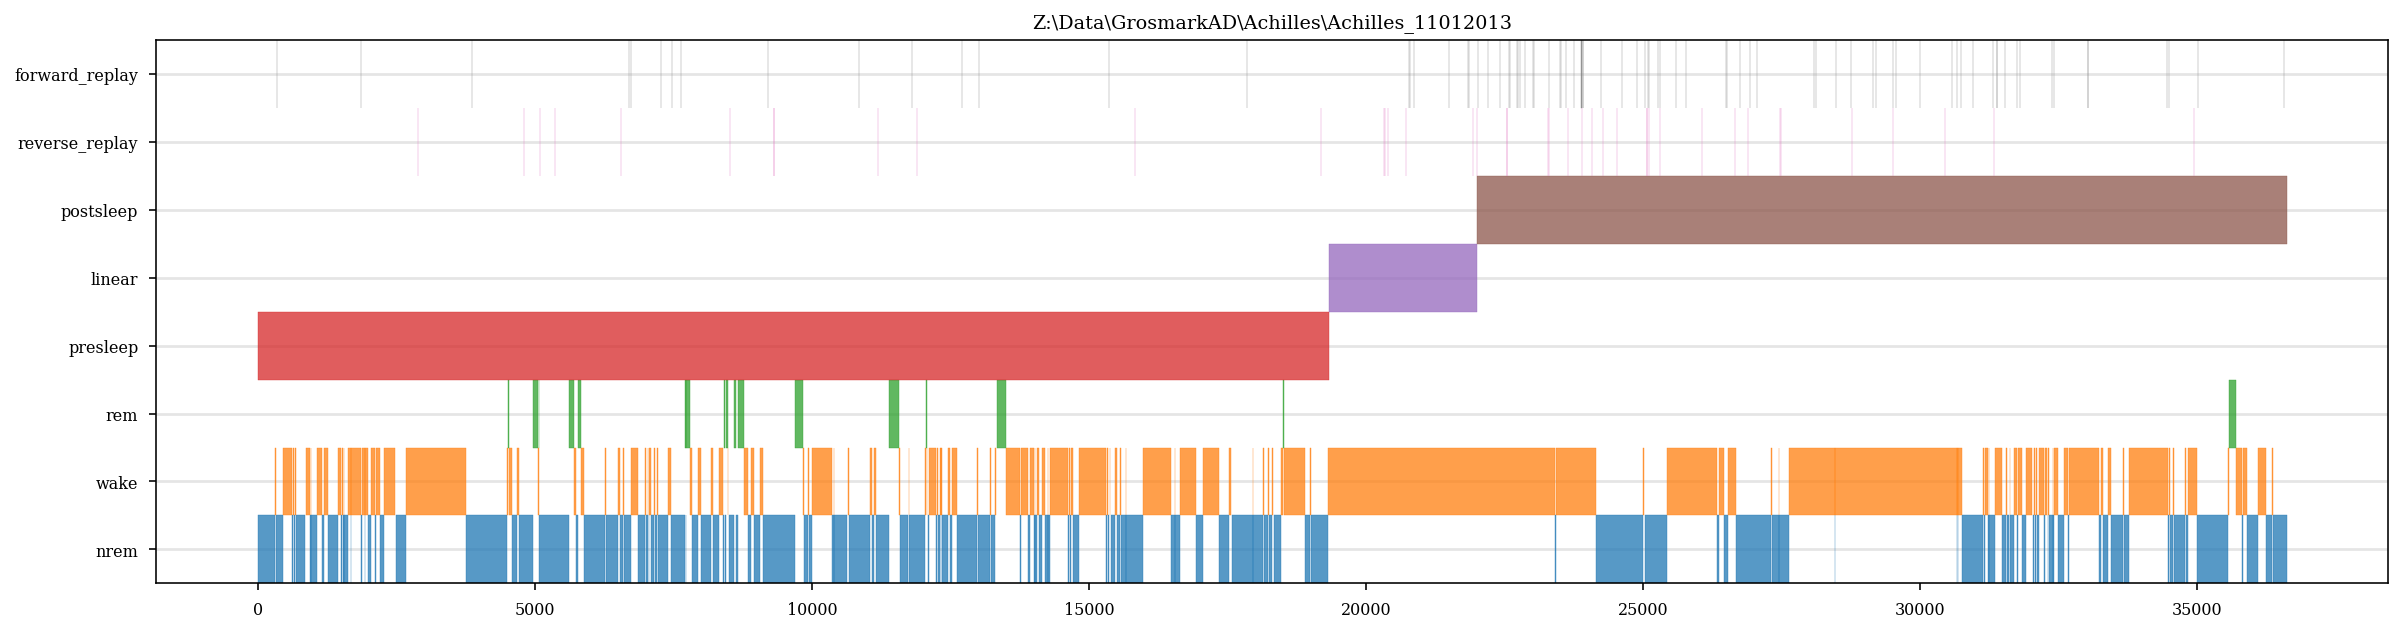

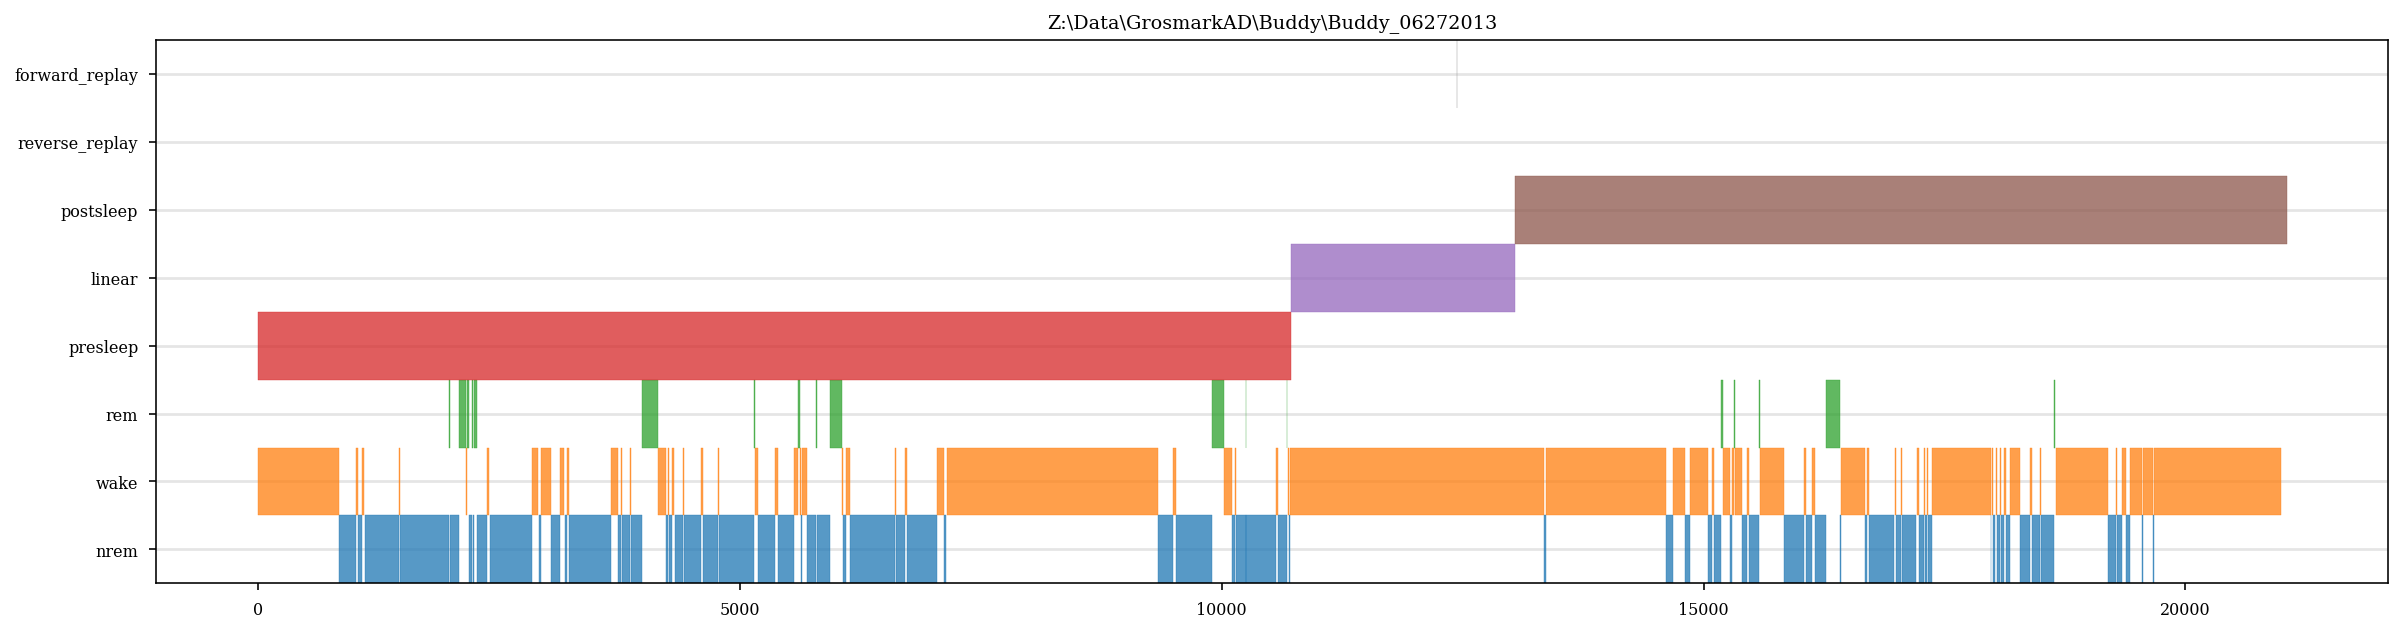

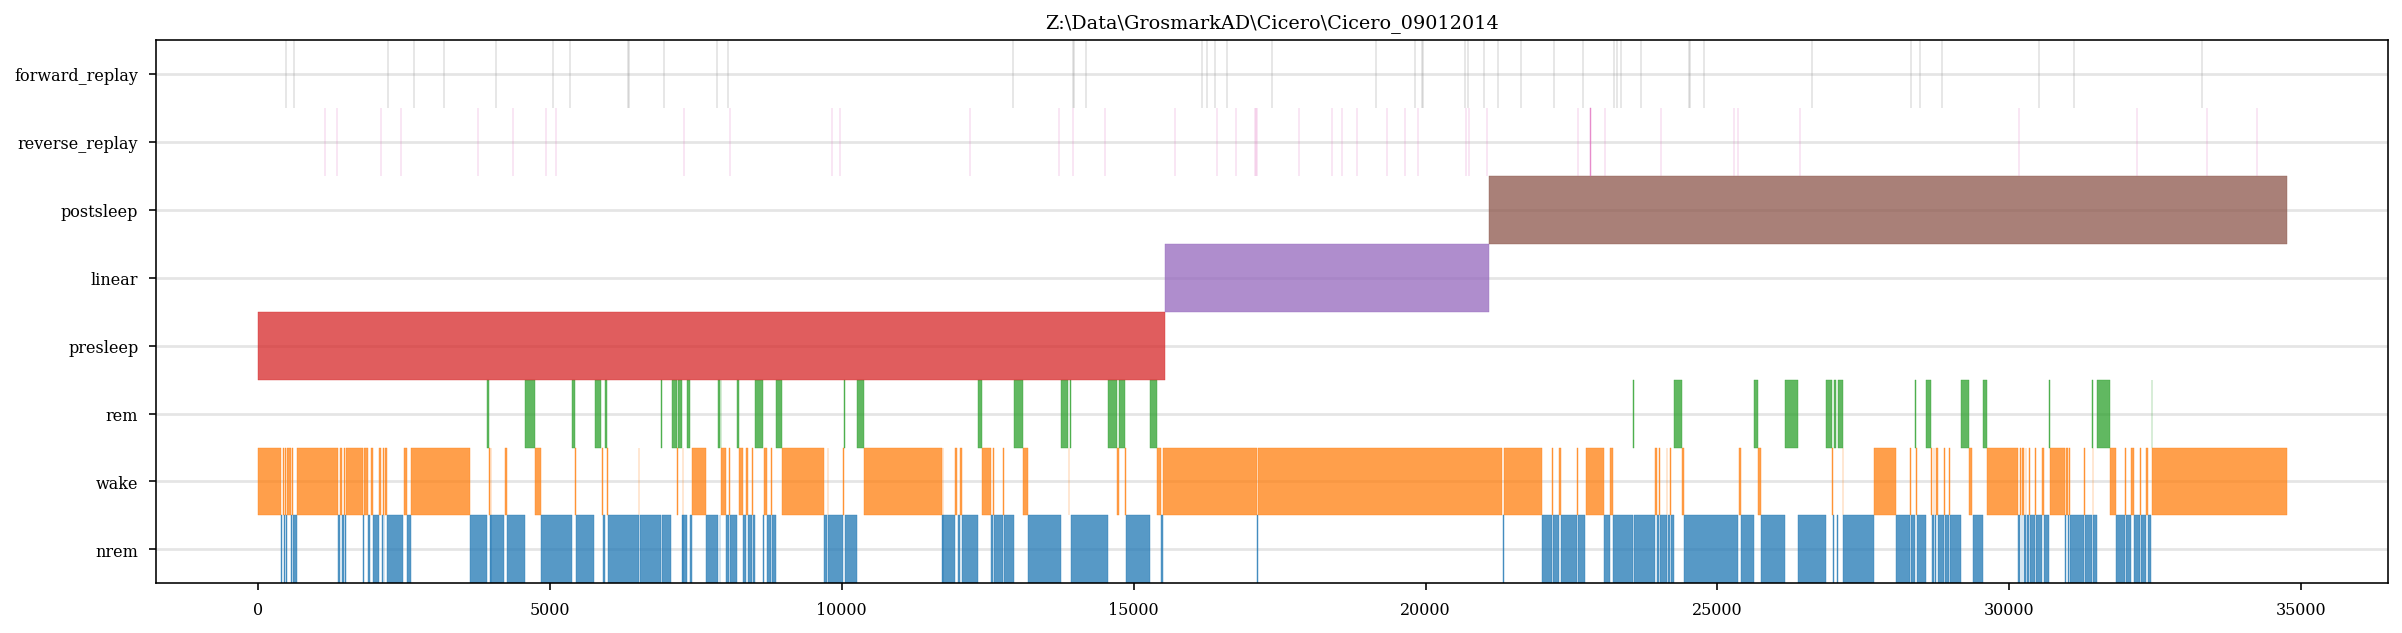

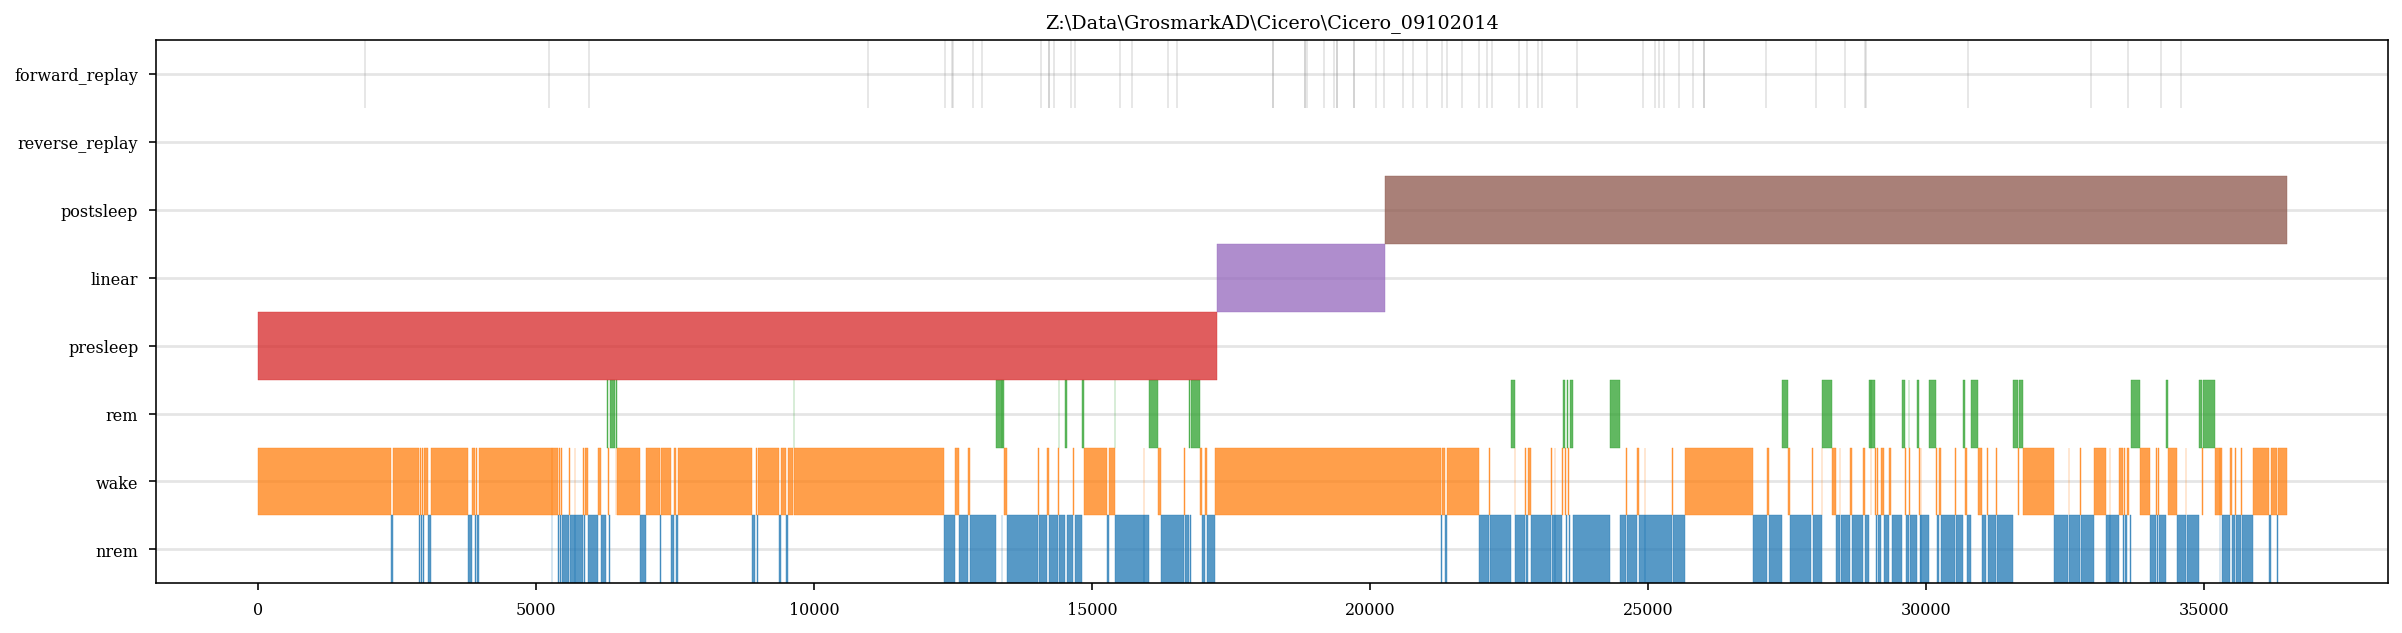

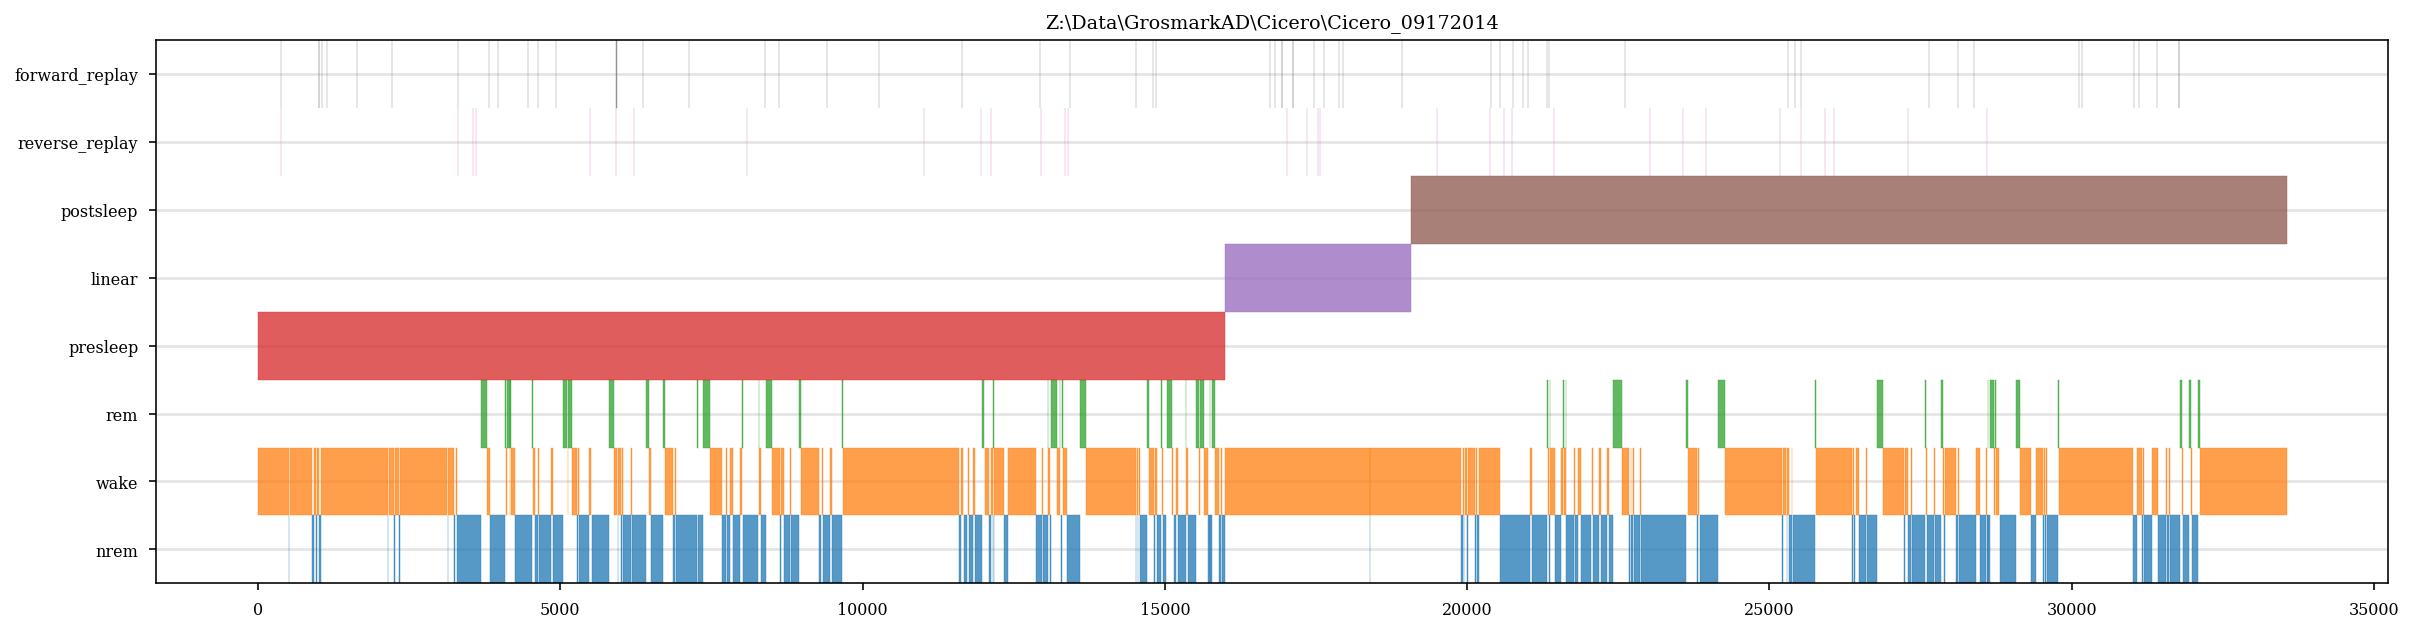

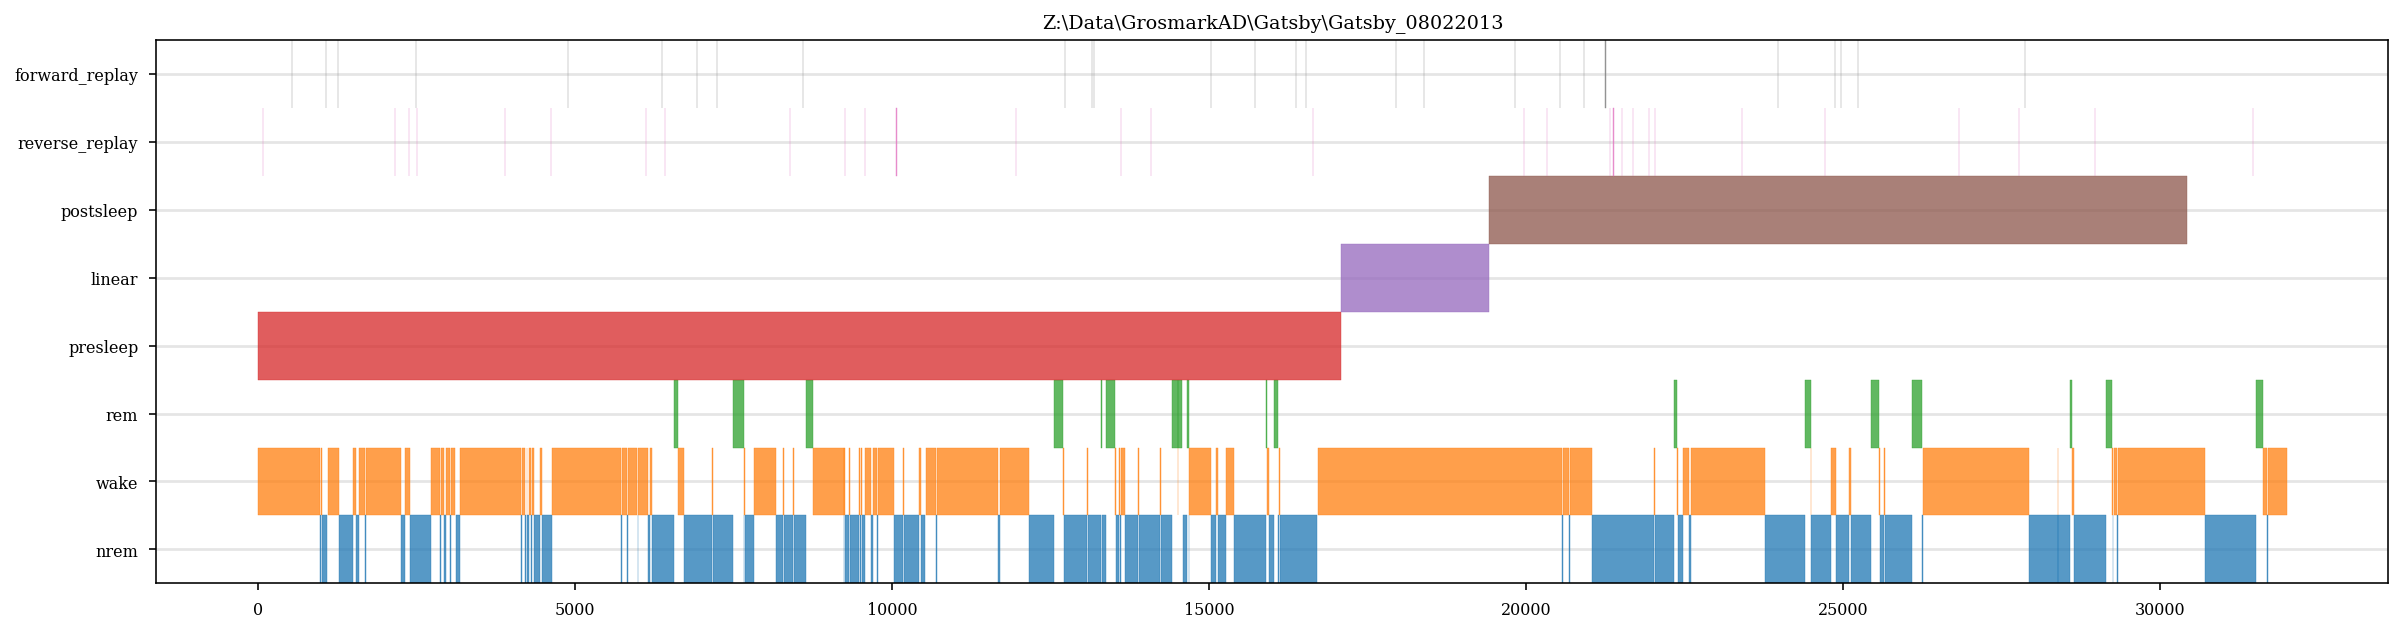

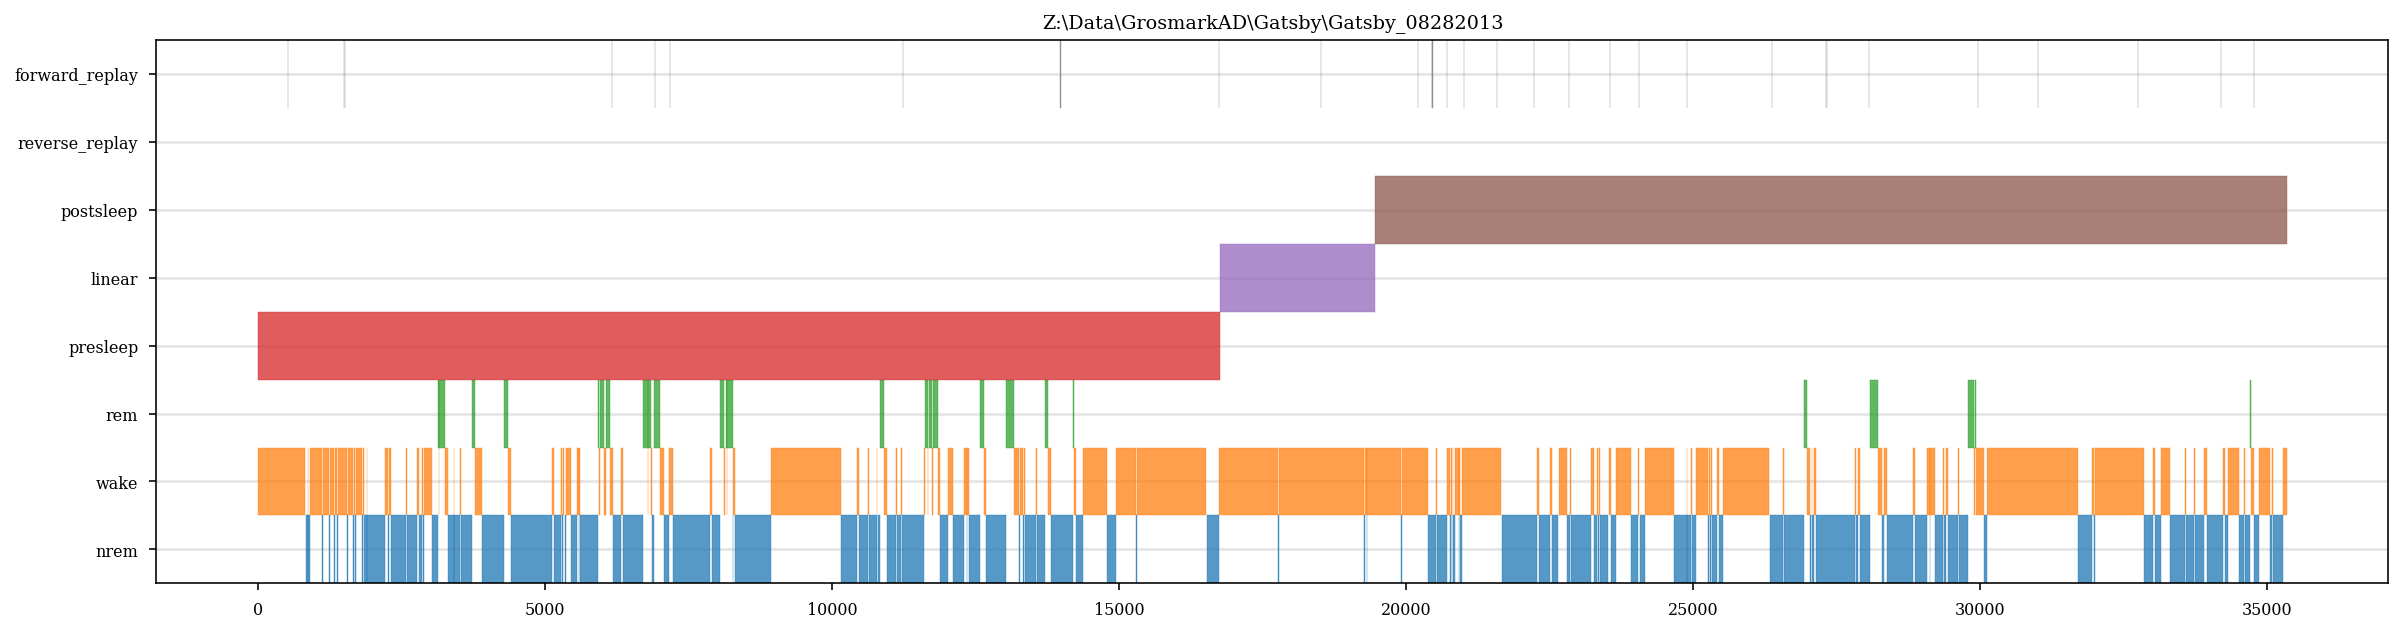

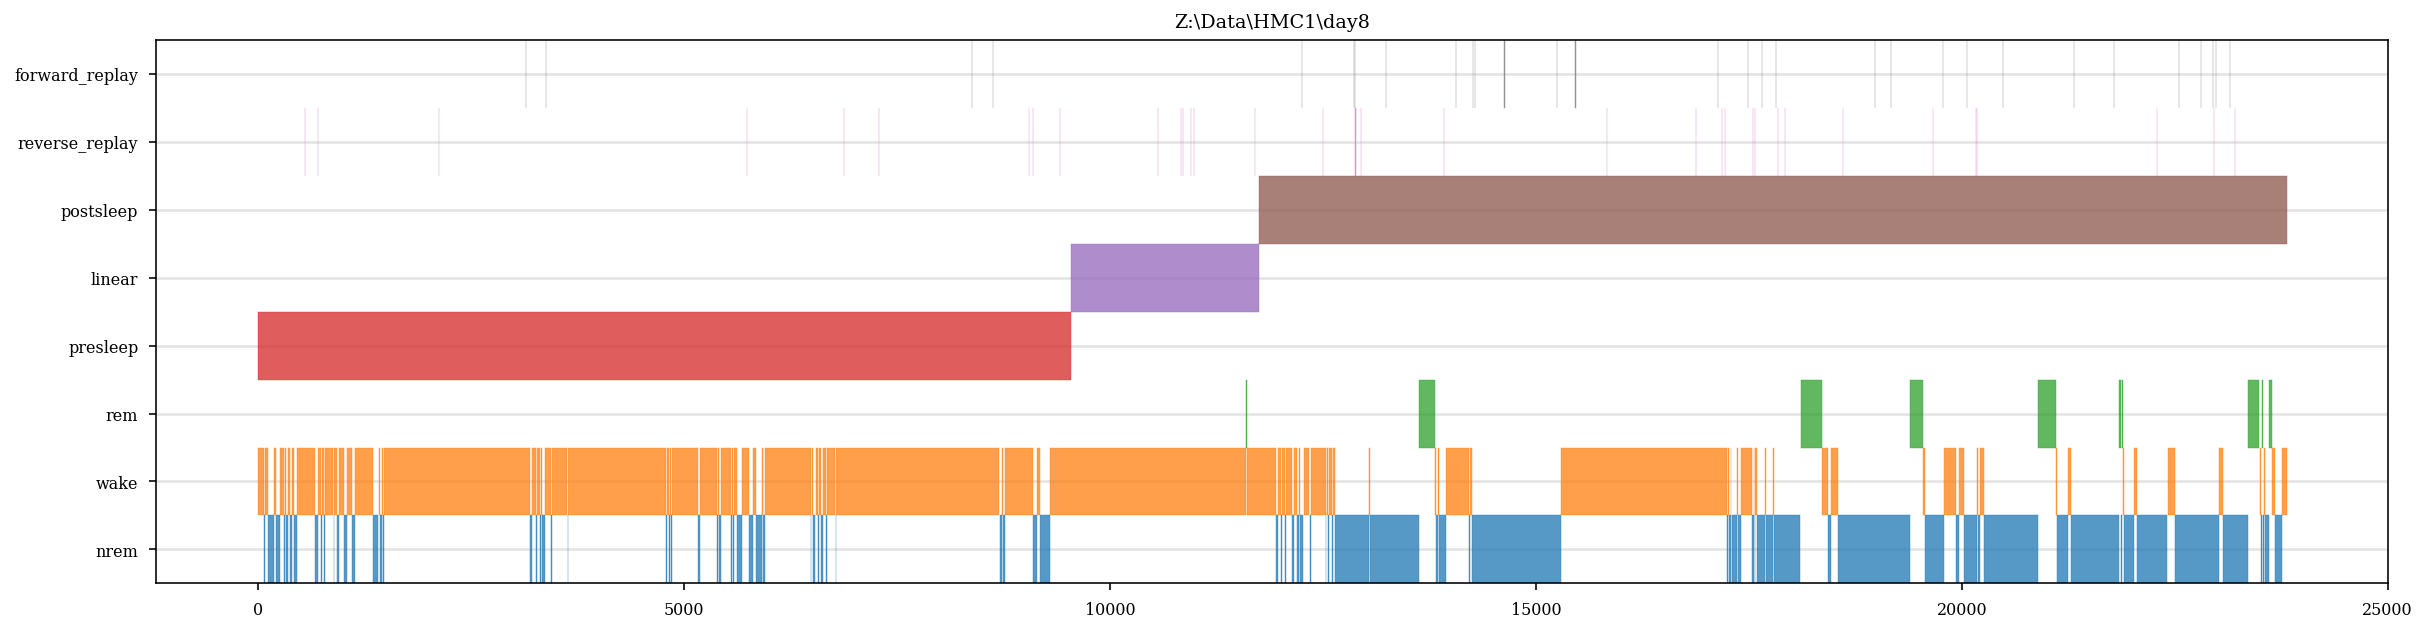

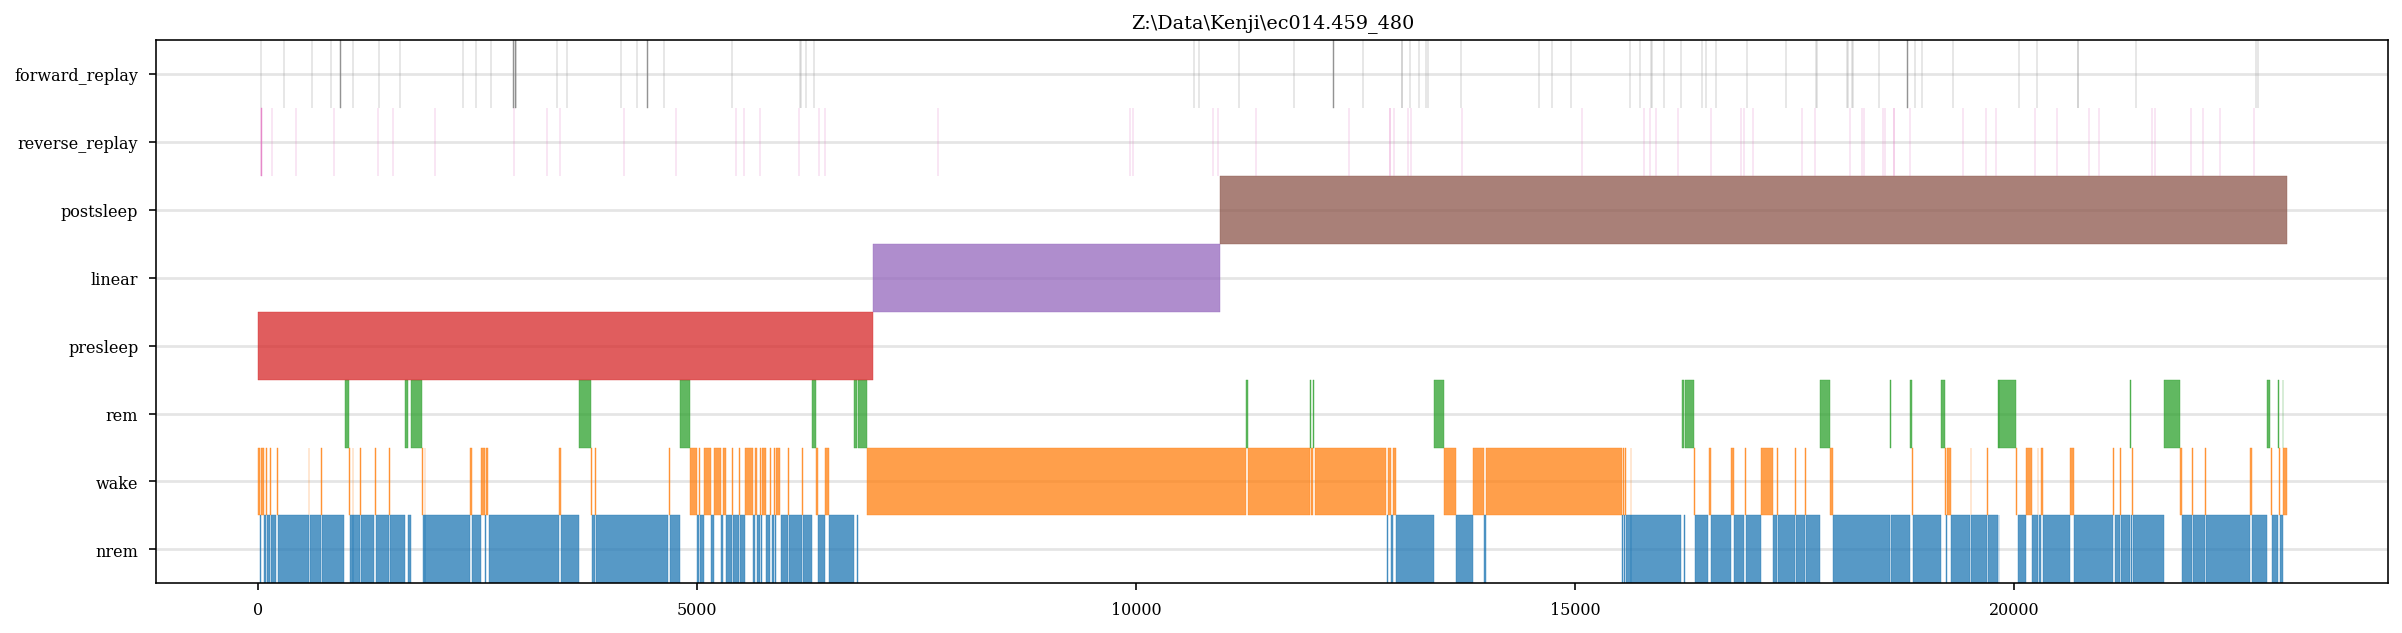

In [101]:
import custom_plots

sessions = glob.glob(save_path +os.sep+ '*.pkl')
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    try:
        events,labels = gather_events(results['outbound_epochs']['df'].basepath.unique()[0])
        basepath = results['outbound_epochs']['df'].basepath.unique()[0]
    except:
        events,labels = gather_events(results['inbound_epochs']['df'].basepath.unique()[0])
        basepath = results['inbound_epochs']['df'].basepath.unique()[0]

    plt.figure(figsize=(20,5))
    custom_plots.plot_events(events,labels)
    plt.title(basepath)    

## Find individual examples

In [35]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]

In [79]:
# test = results['bst_placecells'][idx]
# # results['sta_placecells']
# test.bin_centers

any(results['df']['replay_type'] == np.nan)

False

In [4]:
sessions = glob.glob(save_path +os.sep+ '*.pkl')

with open(sessions[0], 'rb') as f:
    results = pickle.load(f)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


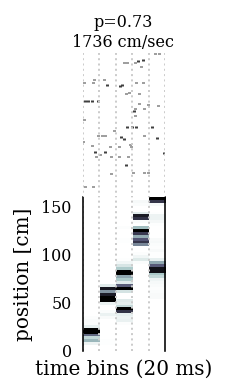

In [98]:
importlib.reload(replay_fig)

idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[2]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title) 

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


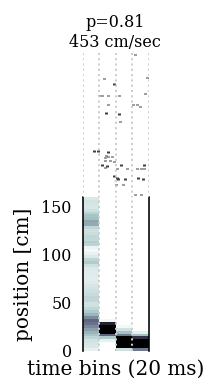

reverse


In [44]:
idxs = np.where((results['df']['replay_type'] == 'reverse') & (results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[1]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
# results['df'].replay_type

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


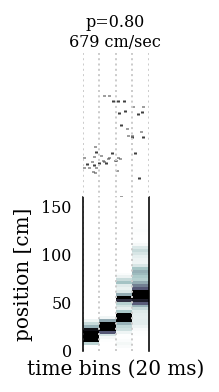

forward


In [45]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[31]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


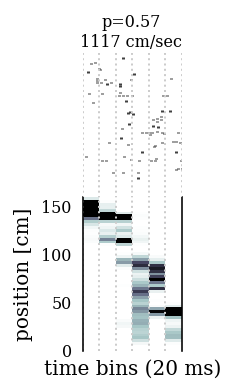

forward


In [46]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = idxs[29]
idx = int(idx)
if isinstance(idx, int):
    title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
else:
    title = ""
ax = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                        results['sta_placecells'],
                                        results['tc'],
                                        results['tc'],
                                        vmax=.1,
                                        title_str=title)  

print(results['df'].replay_type.iloc[idx])

In [50]:
idxs = np.where((results['df']['score_pval_col_cycle']<0.05) &
                       (results['df']['score_pval_time_swap']<0.05) &
                       (results['df']['n_active']>5) &
                       (results['df']['inactive_bin_prop']<.2))[0]
idx = (
        (results['df']['score_pval_col_cycle']<0.05) &
        (results['df']['score_pval_time_swap']<0.05)
        )
results['df'][idx]               

start        stop       peaks   amplitude  duration   frequency  \
24        47.6952     47.8432     47.7912  851.758590    0.1480  161.080797   
227      862.1312    862.2456    862.1608  850.904118    0.1144  192.164774   
228      862.1312    862.2456    862.1608  850.904118    0.1144  192.164774   
261      960.9256    961.0640    960.9712  690.977610    0.1384  173.337576   
539     2095.3560   2095.4424   2095.4232  378.692609    0.0864  176.284368   
...           ...         ...         ...         ...       ...         ...   
10845  33345.9768  33346.1384  33346.0552  686.269406    0.1616  161.658598   
10901  33636.1368  33636.2920  33636.2184  707.100262    0.1552  166.927743   
10902  33636.1368  33636.2920  33636.2184  707.100262    0.1552  166.927743   
11108  34270.2720  34270.4184  34270.2928  895.957985    0.1464  184.415552   
11196  34428.1976  34428.3112  34428.2496  423.913874    0.1136  131.641087   

       detectorName  ripple_channel  event_spk_thres  \
24     bz_DetectSWR              76                1   
227    bz_DetectSWR              76                1   
228    bz_DetectSWR              76                1   
261    bz_DetectSWR              76                1   
539    bz_DetectSWR              76                1   
...             ...             ...              ...   
10845  bz_DetectSWR              76                1   
10901  bz_DetectSWR              76                1   
10902  bz_DetectSWR              76                1   
11108  bz_DetectSWR              76                1   
11196  bz_DetectSWR              76                1   

                                            basepath  ...      slope  \
24     Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -18.328841   
227    Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ...  34.716981   
228    Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ...  34.716981   
261    Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -10.954178   
539    Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -23.245283   
...                                              ...  ...        ...   
10845  Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ...  14.159928   
10901  Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -18.652291   
10902  Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -18.652291   
11108  Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ... -23.180593   
11196  Z:\Data\GrosmarkAD\Achilles\Achilles_10252013  ...   8.452830   

           intercept  score_pval_time_swap  score_pval_col_cycle   traj_dist  \
24        276.010782              0.001999              0.009993  109.973046   
227     -3978.566038              0.019320              0.006662  138.867925   
228     -4152.150943              0.013324              0.007328  138.867925   
261      1570.875112              0.027981              0.035310   54.770889   
539      6386.113208              0.041306              0.041972   69.735849   
...              ...                   ...                   ...         ...   
10845 -146645.283019              0.007995              0.016656   99.119497   
10901  194103.935310              0.001999              0.003331  111.913747   
10902  194234.501348              0.001999              0.001999  111.913747   
11108  244448.625337              0.000666              0.005996  139.083558   
11196  -89476.830189              0.019987              0.005996   33.811321   

        traj_speed  traj_step  replay_type  dist_rat_start  dist_rat_end  
24      916.442049  18.328841          NaN             NaN           NaN  
227    1735.849057  34.716981          NaN             NaN           NaN  
228    1735.849057  34.716981          NaN             NaN           NaN  
261     547.708895  10.954178          NaN             NaN           NaN  
539    1162.264151  23.245283          NaN             NaN           NaN  
...            ...        ...          ...             ...           ...  
10845   707.996406  14.159928          

In [200]:
import warnings
warnings.filterwarnings("ignore")

idxs = np.where((results['df']['score_pval_col_cycle']<0.05))[0]

for idx in idxs:   
    idx = int(idx)   
    if isinstance(idx, int):
        title = "p={:.2f}\n{:.0f} cm/sec".format(results['df'].trajectory_score.iloc[idx], results['df'].traj_speed.iloc[idx])
    else:
        title = ""
    ax,fig = replay_fig.plot_all_replay(results['bst_placecells'][idx],
                                            results['sta_placecells'],
                                            results['tc'],
                                            results['tc'],
                                            vmax=.1,
                                            title_str=title)           
    fig.savefig(os.path.join(fig_save_path,'replay_examples',str(idx)+'_.png'),dpi=300,bbox_inches='tight')
    plt.close(fig)

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import nelpy.plotting as npl
import nelpy as nel

def plot_all_PBEs(bst, spiketrainarray, tuningcurve, tc_placecells, idx=None, title_str=None,vmax=.1):
    if idx is not None:
        bst = bst[idx]
    st = spiketrainarray
    tc = tuningcurve
    tc_placecells = tc_placecells

    no = tc_placecells.get_peak_firing_order_ids()
    st.reorder_units_by_ids(no, inplace=True)

    st_cut = st[bst.support]
    st_cut._support = bst.support # hacky fix so that we can plot events out of order
    st_cut = nel.utils.collapse_time(st_cut)

    # decode neural activity
    posterior, bdries, mode_pth, mean_pth = nel.decoding.decode1D(bst=bst, ratemap=tc, xmax=120)
    
    width,height = functions.set_size('thesis', fraction=.25, subplots=(3, 1))

#     with npl.FigureManager(show=True, figsize=(0.2*bst.n_bins,4)) as (fig, ax):
    with npl.FigureManager(show=True, figsize=(width*bst.n_bins*.1,height)) as (fig, ax):

        npl.utils.skip_if_no_output(fig)

        pixel_width = 0.5
        if vmax == False:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax, rasterized=True)
        else:
            npl.imagesc(x=np.arange(bst.n_bins), y=np.arange(121), data=posterior, cmap=plt.cm.bone_r, ax=ax,vmax=vmax, rasterized=True)
#         npl.utils.yticks_interval(310)
        npl.utils.no_yticks(ax)
        # plt.imshow(posterior, cmap=plt.cm.Spectral_r, interpolation='none', aspect='auto')
        ax.vlines(np.arange(bst.lengths.sum())-pixel_width, *ax.get_ylim(), lw=1, linestyle=':', color='0.8')
        ax.vlines(np.cumsum(bst.lengths)-pixel_width, *ax.get_ylim(), lw=1)

        ax.set_xlim(-pixel_width, bst.lengths.sum()-pixel_width)

        event_centers = np.insert(np.cumsum(bst.lengths),0,0)
        event_centers = event_centers[:-1] + bst.lengths/2 - 0.5

        ax.set_xticks(event_centers)
        if idx is not None:
            ax.set_xticklabels(idx)
        else:
            ax.set_xticklabels(np.arange(bst.n_epochs))

        npl.utils.no_xticks(ax)
#         npl.utils.clear_left_right(ax)
        npl.utils.clear_top_bottom(ax)
        
        divider = make_axes_locatable(ax)
        axRaster = divider.append_axes("top", size=1, pad=0)

        npl.rasterplot(st_cut, vertstack=True, ax=axRaster, lh=1.25)
        axRaster.set_xlim(st_cut.support.time.squeeze())
        bin_edges = np.linspace(st_cut.support.time[0,0],st_cut.support.time[0,1], bst.n_bins+1)
        axRaster.vlines(bin_edges, *ax.get_ylim(), lw=1, linestyle=':', color='0.8',zorder=-1000)
#         axRaster.vlines(bin_edges[np.cumsum(bst.lengths)], *ax.get_ylim(), lw=1, color='0.2')
        npl.utils.no_xticks(axRaster)
        npl.utils.no_xticklabels(axRaster)
        npl.utils.no_yticklabels(axRaster)
        npl.utils.no_yticks(axRaster)
        ax.set_ylabel('position [cm]')
        ax.set_xlabel('time bins (20 ms)')
        if title_str:
            fig.suptitle(title_str,fontsize=8)
        npl.utils.clear_left_right(axRaster)
#         npl.utils.clear_right(axRaster)
        npl.utils.clear_top_bottom(axRaster)
    return ax,fig